## Machine Learning - 1 Coded Project

## Problem Statement:1

### Clustering:

### Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 


### Part 1:--1)Clustering: Define the problem and perform Exploratory Data Analysis
- Problem definition - Check shape, Data types, statistical summary - Univariate analysis - Bivariate analysis - Key meaningful observations on individual variables and the relationship between variables

In [280]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
#read the dataset
df=pd.read_excel("Clustering+Clean+Ads_Data.xlsx")

In [282]:
#print first 5 rows
df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [283]:
#print last 5 rows
df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

#### 1---1)-a)- Check shape

In [284]:
#shape of te data set
df.shape

(23066, 19)

#### 1---1)-b)-Data types

In [285]:
#check the data types of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

#### 1---1)-c)-statistical summary 

In [286]:
#check the statical summary
df.describe().T.round(2)

count        mean         std       min       25%  \
Ad - Length            23066.0      385.16      233.65    120.00    120.00   
Ad- Width              23066.0      337.90      203.09     70.00    250.00   
Ad Size                23066.0    96674.47    61538.33  33600.00  72000.00   
Available_Impressions  23066.0  2432043.67  4742887.76      1.00  33672.25   
Matched_Queries        23066.0  1295099.14  2512969.86      1.00  18282.50   
Impressions            23066.0  1241519.52  2429399.96      1.00   7990.50   
Clicks                 23066.0    10678.52    17353.41      1.00    710.00   
Spend                  23066.0     2706.63     4067.93      0.00     85.18   
Fee                    23066.0        0.34        0.03      0.21      0.33   
Revenue                23066.0     1924.25     3105.24      0.00     55.37   
CTR                    18330.0        0.07        0.08      0.00      0.00   
CPM                    18330.0        7.67        6.48      0.00      1.71   
CPC                    18330.0        0.35        0.34      0.00      0.09   

                             50%         75%          max  
Ad - Length               300.00      720.00       728.00  
Ad- Width                 300.00      600.00       600.00  
Ad Size                 72000.00    84000.00    216000.00  
Available_Impressions  483771.00  2527711.75  27592861.00  
Matched_Queries        258087.50  1180700.00  14702025.00  
Impressions            225290.00  1112428.50  14194774.00  
Clicks                   4425.00    12793.75    143049.00  
Spend                    1425.12     3121.40     26931.87  
Fee                         0.35        0.35         0.35  
Revenue                   926.34     2091.34     21276.18  
CTR                         0.08        0.13         1.00  
CPM                         7.66       12.51        81.56  
CPC                         0.16        0.57         7.26

In [287]:
#check the null values
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

null values in CTR,CPM,CPC 

In [288]:
#check the total duplicated values in the data set
df.duplicated().sum()

0

no duplicated values

In [289]:
#create data frame with categorical variables
#create data frame with numerical variables
df_cat=df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [290]:
#CATEGORICAL COLUMNS
df_cat.columns

Index(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type',
       'Format'],
      dtype='object')

In [291]:
#counts for Inventory Type
df["InventoryType"].value_counts()

Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64

In [292]:
#count of Ad Type
df["Ad Type"].value_counts()

Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64

In [293]:
#count of platform
df["Platform"].value_counts()

Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64

In [294]:
#count of Device Type
df["Device Type"].value_counts()

Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64

In [295]:
#count of formats
df["Format"].value_counts()

Video      11552
Display    11514
Name: Format, dtype: int64

### 1---1-d)Univariate analysis 

In [296]:
#numerical columns
df_num.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

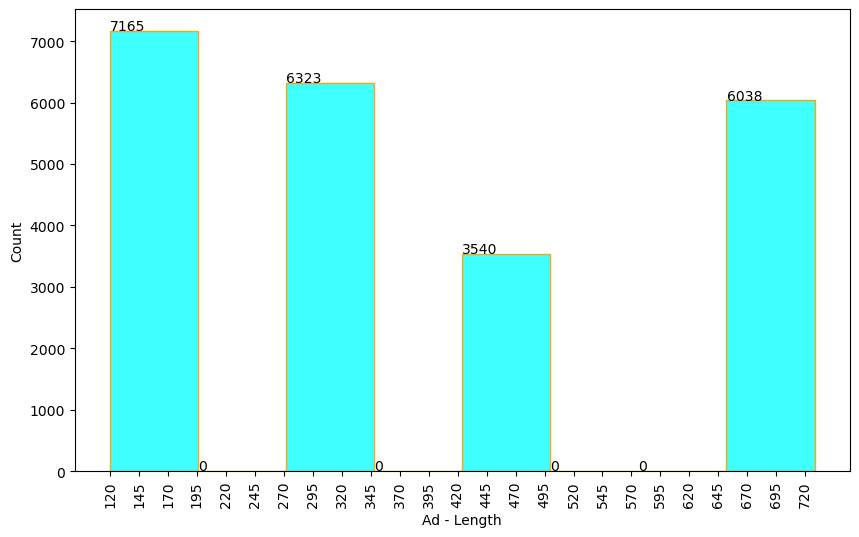

In [297]:
#plot histogram of Ad_length
max,min=df["Ad - Length"].max(),df["Ad - Length"].min()
filtered_data = df[(df['Ad - Length'] >= min) & (df['Ad - Length'] <= max)]
plt.figure(figsize=(10,6))
ax = sns.histplot(filtered_data['Ad - Length'], bins=8, edgecolor='orange', color='cyan')
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
plt.xticks(range(min,max,25))
plt.xticks(rotation=90)
plt.show()

In [298]:
#create data frame with numerical columns
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64


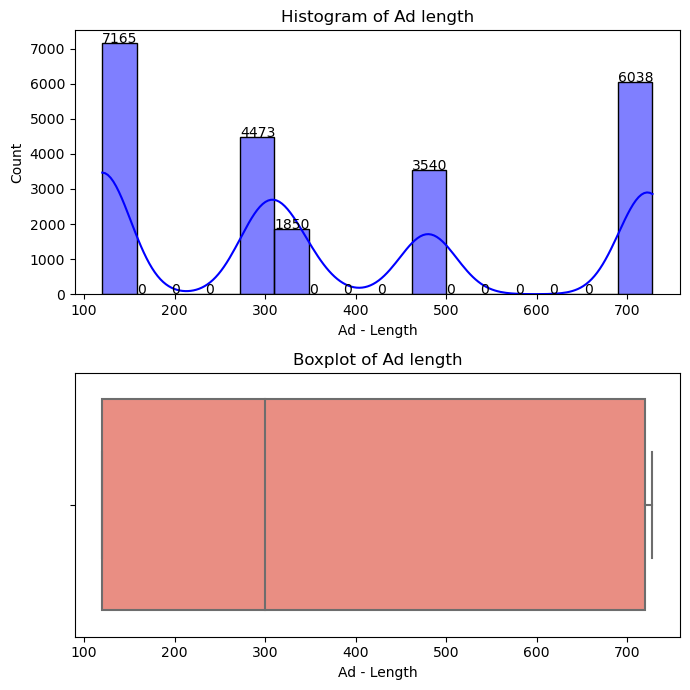

In [299]:
#plot histogram and boxplot of Ad-length
print(df["Ad - Length"].describe())
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
# Plot histogram
max,min=df["Ad - Length"].max(),df["Ad - Length"].min()
ax=sns.histplot(df['Ad - Length'], ax=axs[0], kde=True, color='blue')
axs[0].set_title('Histogram of Ad length')
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
# Plot boxplot
sns.boxplot(x=df['Ad - Length'], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot of Ad length')
# Adjust layout
plt.tight_layout()


count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64


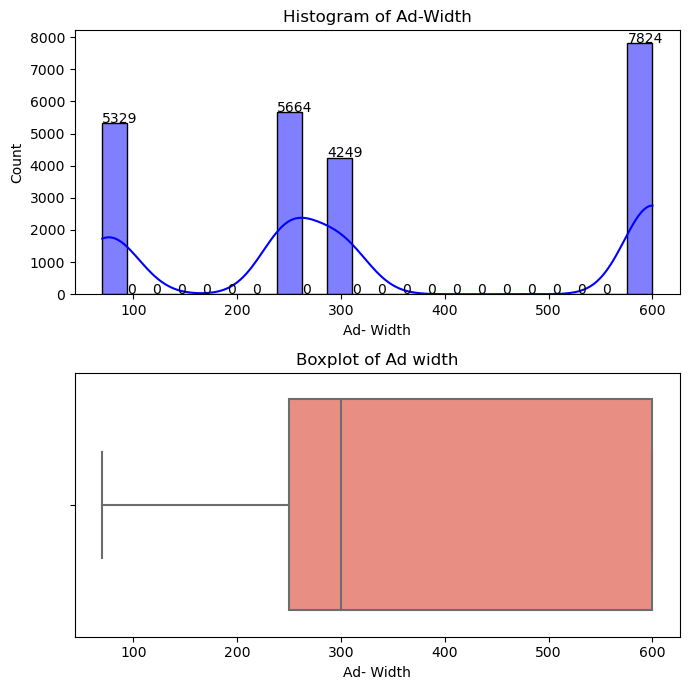

In [300]:
#plot histogram and boxplot of Ad-width
print(df["Ad- Width"].describe())
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
# Plot histogram
max,min=df["Ad- Width"].max(),df["Ad- Width"].min()
ax=sns.histplot(df['Ad- Width'], ax=axs[0], kde=True, color='blue')
axs[0].set_title('Histogram of Ad-Width')
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
# Plot boxplot
sns.boxplot(x=df['Ad- Width'], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot of Ad width')
# Adjust layout
plt.tight_layout()

count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of  Ad Size


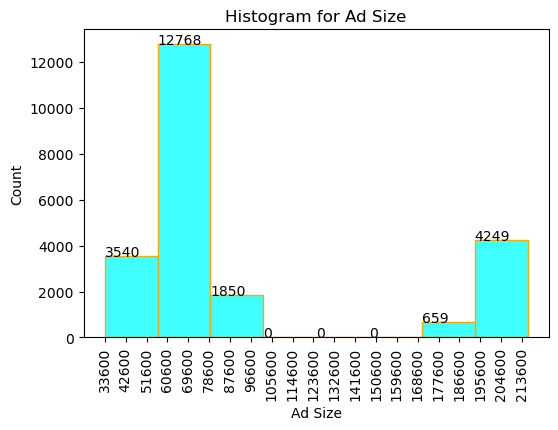

BoxPlot of Ad- size


<Figure size 640x480 with 0 Axes>

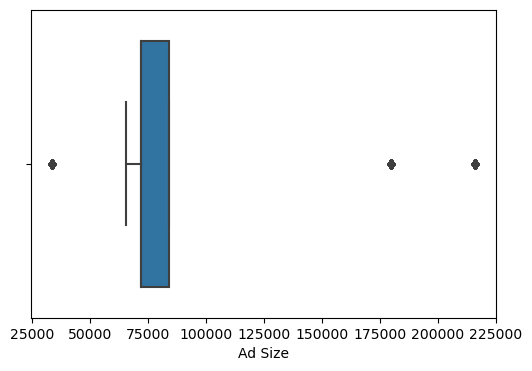

In [301]:
#plot histogram and boxplot of Ad-size
print(df["Ad Size"].describe(),end=' ')
plt.figure(figsize=[6,4])
print("Distribution of  Ad Size" )
a=round(df["Ad Size"].min())
b=round(df["Ad Size"].max())
filtered_data = df[(df["Ad Size"] >= a) & (df["Ad Size"] <= b)]
ax = sns.histplot(filtered_data["Ad Size"], bins=8, edgecolor='orange', color='cyan')
plt.xticks(range(a,b,9000))
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
plt.title('Histogram for Ad Size')
plt.show()
plt.show;
plt.figure()
print("BoxPlot of Ad- size" )
plt.figure(figsize=[6,4])
ax = sns.boxplot(x=df['Ad Size'])
#ax.legend()
plt.show()

count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of  Available_Impressions


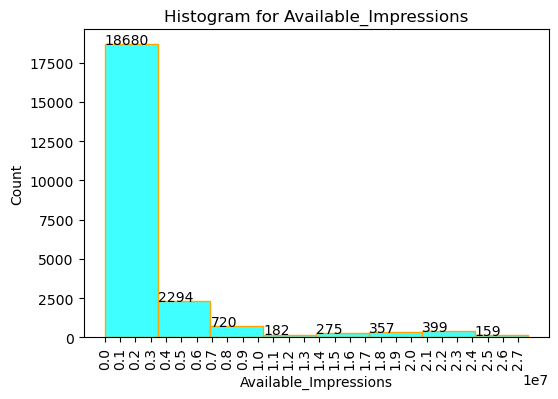

BoxPlot of Available_Impressions


<Figure size 640x480 with 0 Axes>

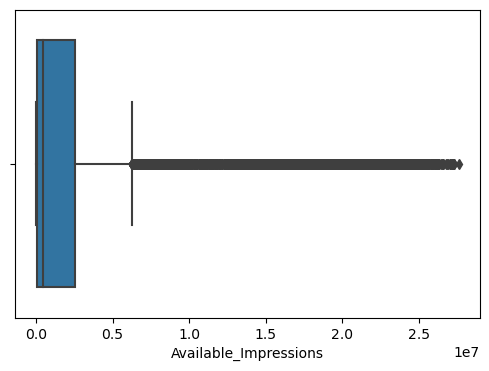

In [302]:

#plot histogram and boxplot of available impression
print(df["Available_Impressions"].describe(),end=' ')
plt.figure(figsize=[6,4])
print("Distribution of  Available_Impressions" )
a=round(df["Available_Impressions"].min())
b=round(df["Available_Impressions"].max())
filtered_data = df[(df["Available_Impressions"] >= a) & (df["Available_Impressions"] <= b)]
ax = sns.histplot(filtered_data["Available_Impressions"], bins=8, edgecolor='orange', color='cyan')
plt.xticks(range(a,b,1000000))
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
plt.title('Histogram for Available_Impressions')
plt.show()
plt.show;
plt.figure()
print("BoxPlot of Available_Impressions" )
plt.figure(figsize=[6,4])
ax = sns.boxplot(x=df['Available_Impressions'])
#ax.legend()
plt.show()

count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries


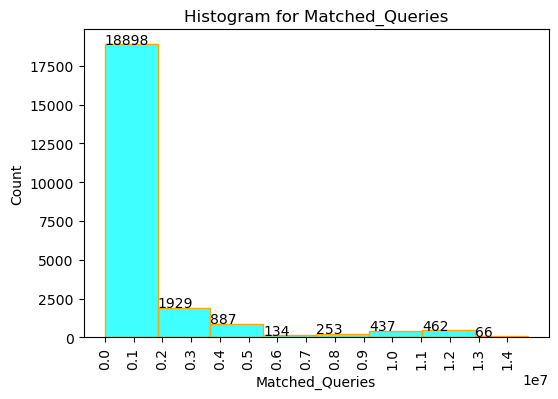

BoxPlot of Matched_Queries


<Figure size 640x480 with 0 Axes>

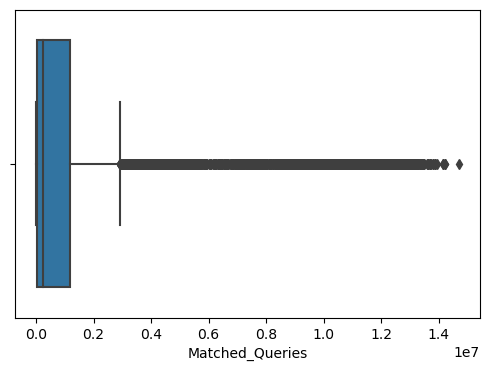

In [303]:
#plot histogram and boxplot of matched queries
print(df["Matched_Queries"].describe(),end=' ')
plt.figure(figsize=[6,4])
print("Distribution of Matched_Queries" )
a=round(df["Matched_Queries"].min())
b=round(df["Matched_Queries"].max())
filtered_data = df[(df["Matched_Queries"] >= a) & (df["Matched_Queries"] <= b)]
ax = sns.histplot(filtered_data["Matched_Queries"], bins=8, edgecolor='orange', color='cyan')
plt.xticks(range(a,b,1000000))
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
plt.title('Histogram for Matched_Queries')
plt.show()
plt.show;
plt.figure()
print("BoxPlot of Matched_Queries" )
plt.figure(figsize=[6,4])
ax = sns.boxplot(x=df['Matched_Queries'])
#ax.legend()
plt.show()

count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions


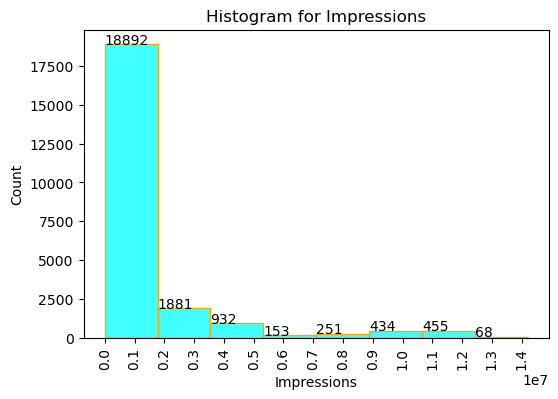

BoxPlot of Impressions


<Figure size 640x480 with 0 Axes>

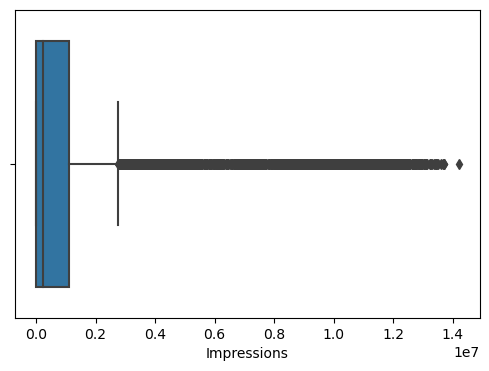

In [304]:
#plot histogram and boxplot of impression
print(df["Impressions"].describe(),end=' ')
plt.figure(figsize=[6,4])
print("Distribution of Impressions" )
a=round(df["Impressions"].min())
b=round(df["Impressions"].max())
filtered_data = df[(df["Impressions"] >= a) & (df["Impressions"] <= b)]
ax = sns.histplot(filtered_data["Impressions"], bins=8, edgecolor='orange', color='cyan')
plt.xticks(range(a,b,1000000))
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
plt.title('Histogram for Impressions')
plt.show()
plt.show;
plt.figure()
print("BoxPlot of Impressions" )
plt.figure(figsize=[6,4])
ax = sns.boxplot(x=df['Impressions'])
#ax.legend()
plt.show()

count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks


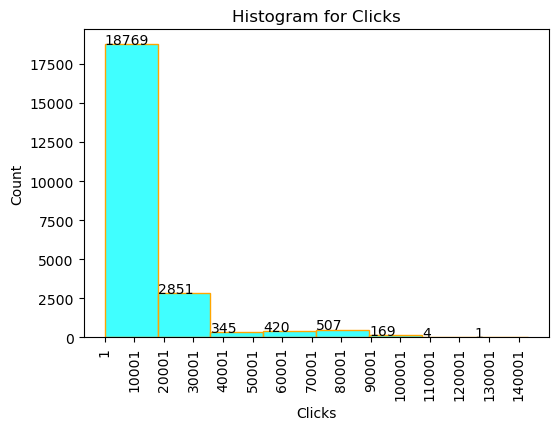

BoxPlot of clicks


<Figure size 640x480 with 0 Axes>

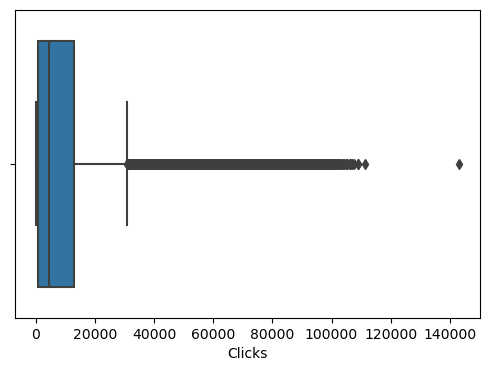

In [307]:
#plot histogram and boxplot of clicks
print(df["Clicks"].describe(),end=' ')
plt.figure(figsize=[6,4])
print("Distribution of Clicks" )
a=round(df["Clicks"].min())
b=round(df["Clicks"].max())
filtered_data = df[(df["Clicks"] >= a) & (df["Clicks"] <= b)]
ax = sns.histplot(filtered_data["Clicks"], bins=8, edgecolor='orange', color='cyan')
plt.xticks(range(a,b,10000))
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
plt.title('Histogram for Clicks')
plt.show()
plt.show;
plt.figure()
print("BoxPlot of clicks" )
plt.figure(figsize=[6,4])
ax = sns.boxplot(x=df['Clicks'])
#ax.legend()
plt.show() 

count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend


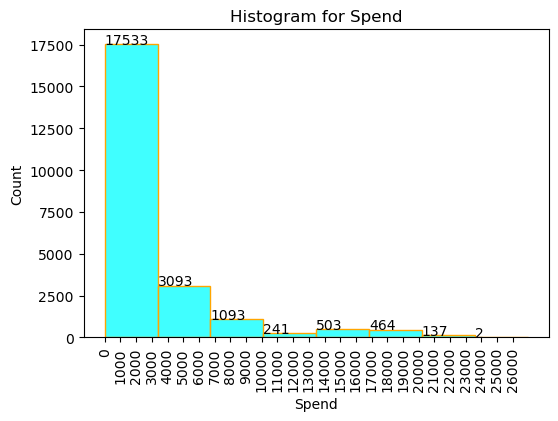

BoxPlot of Spend


<Figure size 640x480 with 0 Axes>

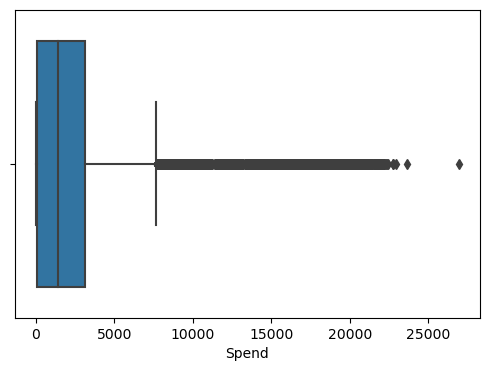

In [308]:
#plot histogram and boxplot of spend
print(df["Spend"].describe(),end=' ')
plt.figure(figsize=[6,4])
print("Distribution of Spend" )
a=round(df["Spend"].min())
b=round(df["Spend"].max())
filtered_data = df[(df["Spend"] >= a) & (df["Spend"] <= b)]
ax = sns.histplot(filtered_data["Spend"], bins=8, edgecolor='orange', color='cyan')
plt.xticks(range(a,b,1000))
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
plt.title('Histogram for Spend')
plt.show()
plt.show;
plt.figure()
print("BoxPlot of Spend" )
plt.figure(figsize=[6,4])
ax = sns.boxplot(x=df['Spend'])
#ax.legend()
plt.show() 

count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64


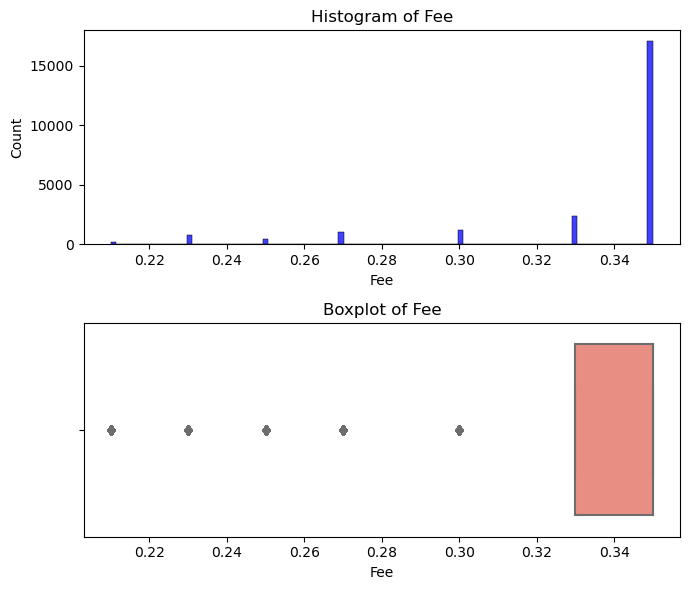

In [309]:
#plot histogram and boxplot of Fee
print(df["Fee"].describe())
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 6))

# Plot histogram
sns.histplot(df['Fee'], ax=axs[0],  color='blue')
axs[0].set_title('Histogram of Fee')

# Plot boxplot
sns.boxplot(x=df["Fee"], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot of Fee')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue


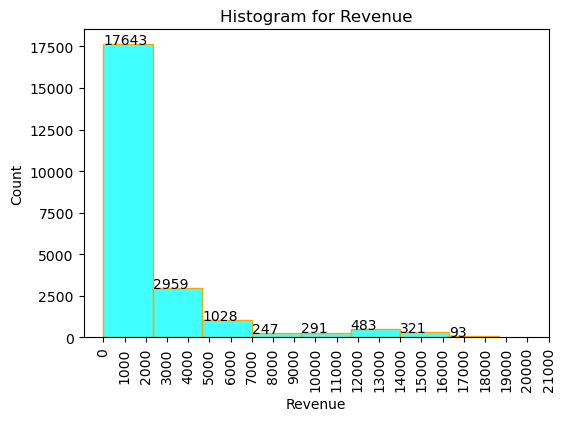

BoxPlot of Revenue


<Figure size 640x480 with 0 Axes>

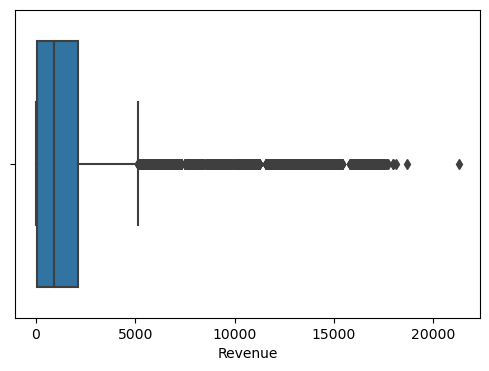

In [310]:
#plot histogram and boxplot of revenue
print(df["Revenue"].describe(),end=' ')
plt.figure(figsize=[6,4])
print("Distribution of Revenue" )
a=round(df["Revenue"].min())
b=round(df["Revenue"].max())
filtered_data = df[(df["Revenue"] >= a) & (df["Revenue"] <= b)]
ax = sns.histplot(filtered_data["Revenue"], bins=8, edgecolor='orange', color='cyan')
plt.xticks(range(a,b,1000))
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
plt.title('Histogram for Revenue')
plt.show()
plt.show;
plt.figure()
print("BoxPlot of Revenue" )
plt.figure(figsize=[6,4])
ax = sns.boxplot(x=df['Revenue'])
#ax.legend()
plt.show() 

count    18330.000000
mean         0.073661
std          0.075160
min          0.000100
25%          0.002600
50%          0.082550
75%          0.130000
max          1.000000
Name: CTR, dtype: float64


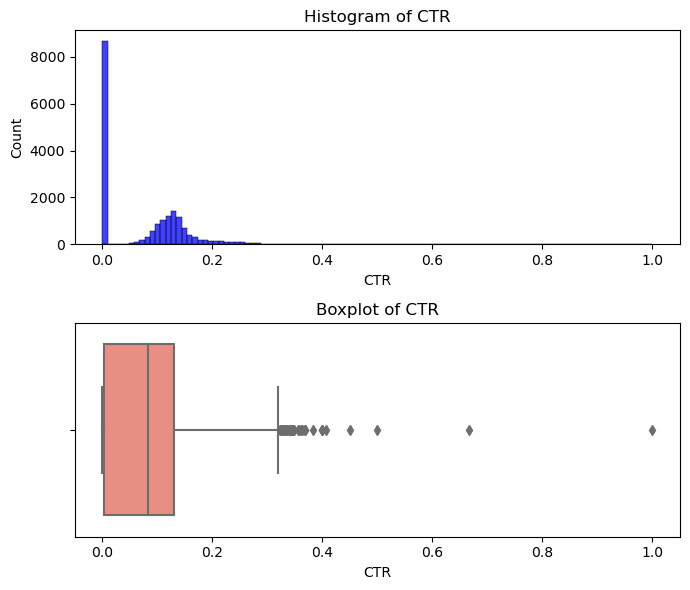

In [311]:
#plot histogram and boxplot of CTR
print(df["CTR"].describe())
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 6))

# Plot histogram
sns.histplot(df['CTR'], ax=axs[0],  color='blue')
axs[0].set_title('Histogram of CTR')

# Plot boxplot
sns.boxplot(x=df["CTR"], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot of CTR')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

count    18330.000000
mean         7.672045
std          6.481391
min          0.000000
25%          1.710000
50%          7.660000
75%         12.510000
max         81.560000
Name: CPM, dtype: float64


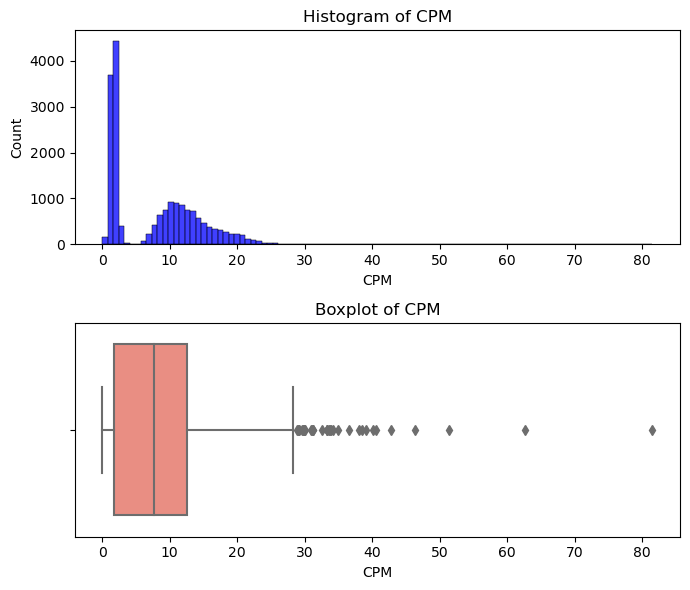

In [312]:
#plot histogram and boxplot of CPM
print(df["CPM"].describe())
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 6))

# Plot histogram
sns.histplot(df['CPM'], ax=axs[0],  color='blue')
axs[0].set_title('Histogram of CPM')

# Plot boxplot
sns.boxplot(x=df["CPM"], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot of CPM')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

count    18330.000000
mean         0.351061
std          0.343334
min          0.000000
25%          0.090000
50%          0.160000
75%          0.570000
max          7.260000
Name: CPC, dtype: float64


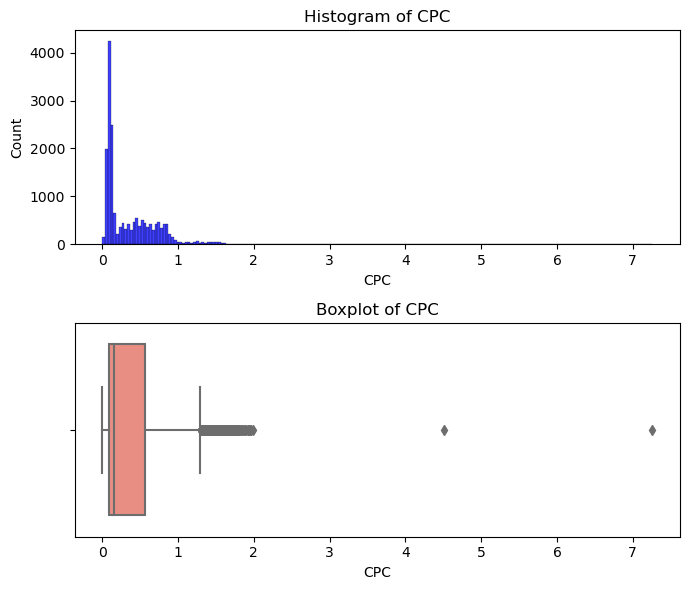

In [313]:
#plot histogram and boxplot of CPC
print(df["CPC"].describe())
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 6))

# Plot histogram
sns.histplot(df['CPC'], ax=axs[0],  color='blue')
axs[0].set_title('Histogram of CPC')

# Plot boxplot
sns.boxplot(x=df["CPC"], ax=axs[1], color='salmon')
axs[1].set_title('Boxplot of CPC')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [35]:
#DESCRIBE THE FEE COLUMN
df_num["Fee"].describe()

count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64

#### Observations
There are 13 numeric fields in the data

Customer ad length ranges from 120  to 728 

maximum of  Ad_width is 600

Ad size ranges from  33600 to 216000 with an average  7200

Available_Impressions ranges from 1.000000e+00 to  2.759286e+07

only few matched queries above 1.4

Average impression is around  2.252900e+05

more Ads are zero clicks very less ads are  more than 80000 Clicks

Spend range is 0.00 to 26931.870000

50%,75%,maximum  of fee of Ads is 350000

maximum of Revenue of Ad is 21276.180000

CTR range in between 0.00 to  1.00

maximum of CPM is  81.560000

Range of CPC 0.000 to  7.260000 with average 0.160000

Outliers to be treated

In [314]:
#UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS
def univariateAnalysis_cat(catcolumn):
    print("-----------------------------------------------------------")
    print("Distribution of " + catcolumn)
    print("----------------------------------------------------------------------------")
    print(df_cat[catcolumn].value_counts())
    plt.figure(figsize=(10,4))
    ax= df_cat[catcolumn].value_counts().plot.bar(title="Frequency Distribution of " + catcolumn)
    for p in ax.patches:
        ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + 0.03, p.get_height() + 9))
    plt.show()

In [315]:
#categorical variables
df_cat=df.select_dtypes(include=["object"])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

In [316]:
#remove the timestamp column 
lstcatcolumns.remove('Timestamp')

-----------------------------------------------------------
Distribution of InventoryType
----------------------------------------------------------------------------
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64


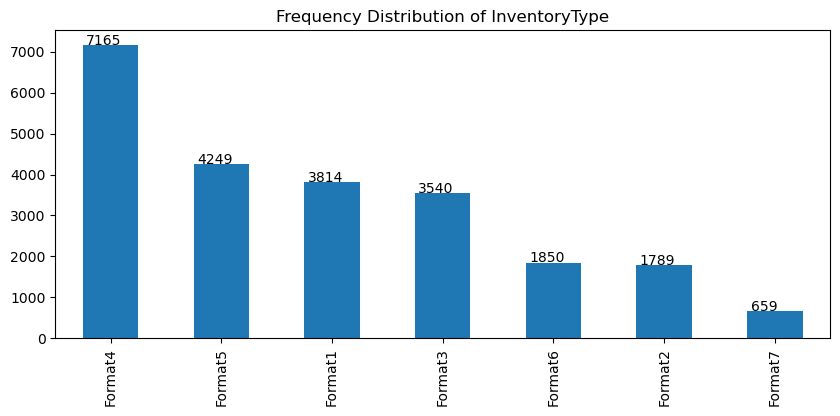

-----------------------------------------------------------
Distribution of Ad Type
----------------------------------------------------------------------------
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64


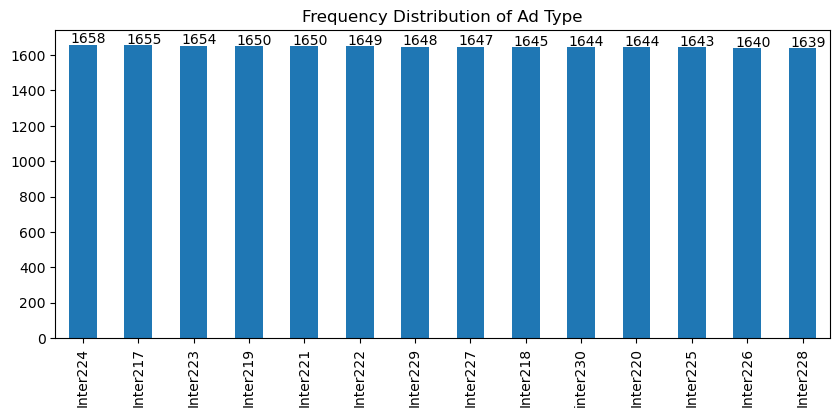

-----------------------------------------------------------
Distribution of Platform
----------------------------------------------------------------------------
Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64


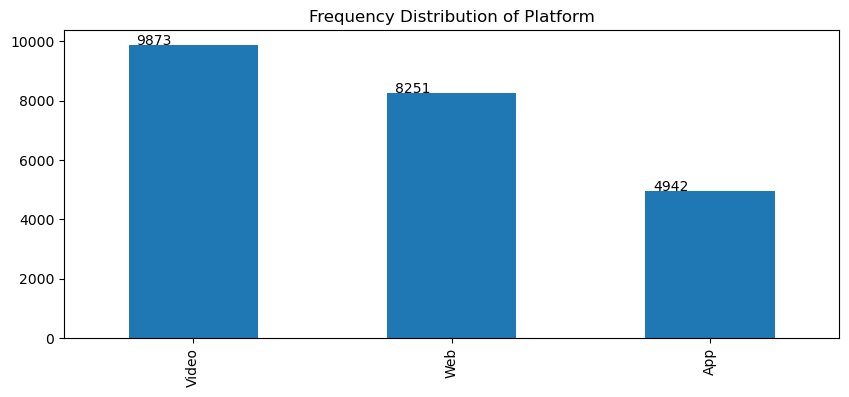

-----------------------------------------------------------
Distribution of Device Type
----------------------------------------------------------------------------
Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64


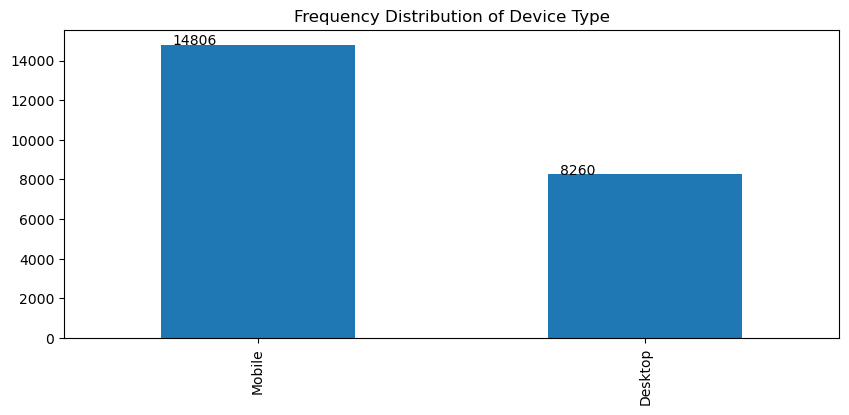

-----------------------------------------------------------
Distribution of Format
----------------------------------------------------------------------------
Video      11552
Display    11514
Name: Format, dtype: int64


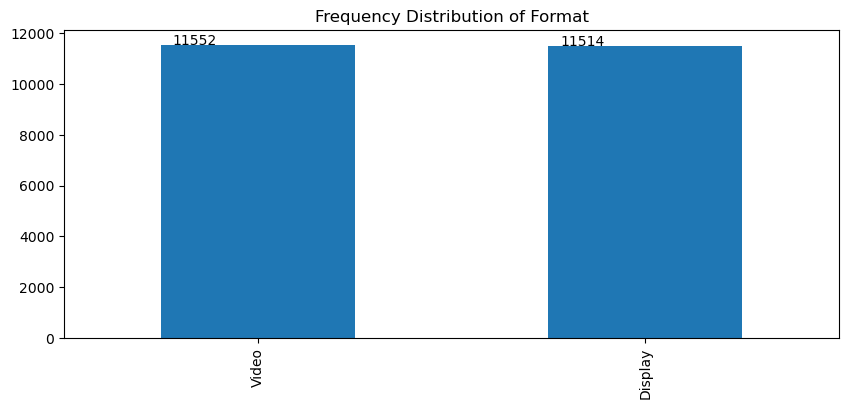

In [317]:
#barplot for categorical variables
for i in lstcatcolumns:
    univariateAnalysis_cat(i)

more inventory type is Format1

counts of All  Ad Type is approximately same

most count Ad are in video platform,less counts in App platform

mobile device have high Ad than desktop

Format of Ads video type and display type are approximately same

### 1---1--e)-Bivariate analysis

In [338]:
#plot the correlation map
corr = df_num.corr(method='pearson')

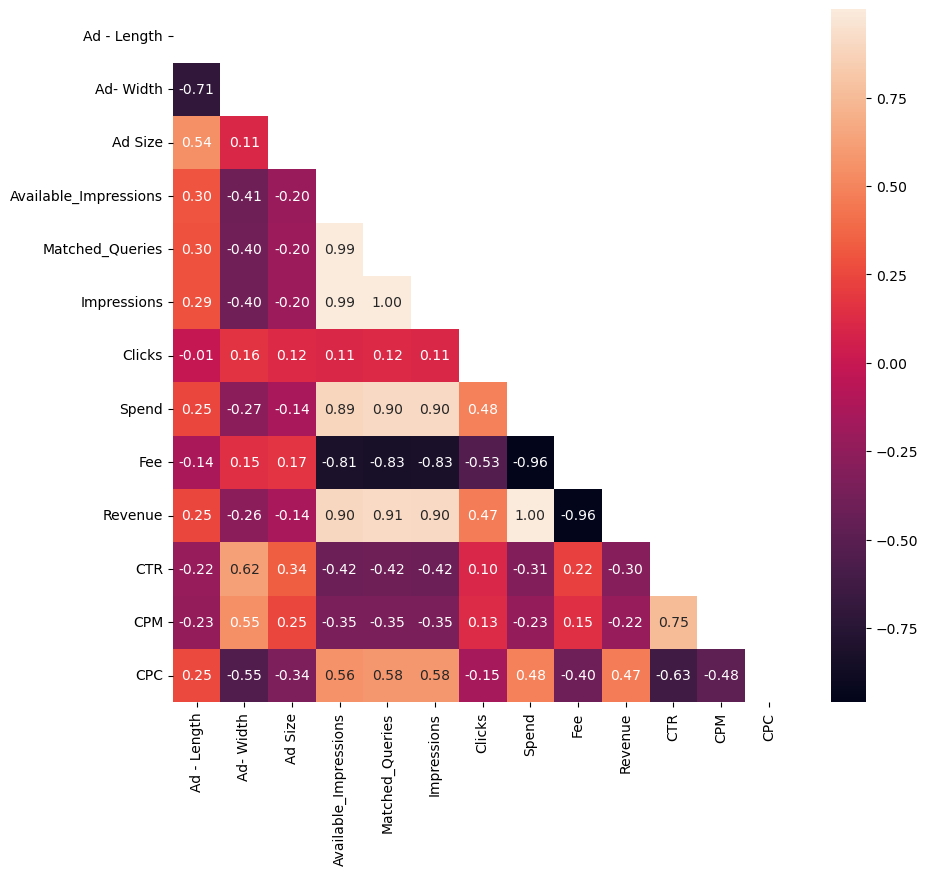

In [339]:
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
fig = plt.subplots(figsize=(10, 9))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

#### Observation


'Spend' shows high correlation with 'Available impression','Matched Queries','impression'

"Revenue"shows high correlation  with 'Available impression','Matched Queries','impression','Spend'

"Fee"negatively correlated  with 'Available impression','Matched Queries','impression','Spend','Revenue'

'CPC'negatively correlated  with 'CTR','CPM'

In [340]:
df_cat.columns

Index(['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type',
       'Format'],
      dtype='object')

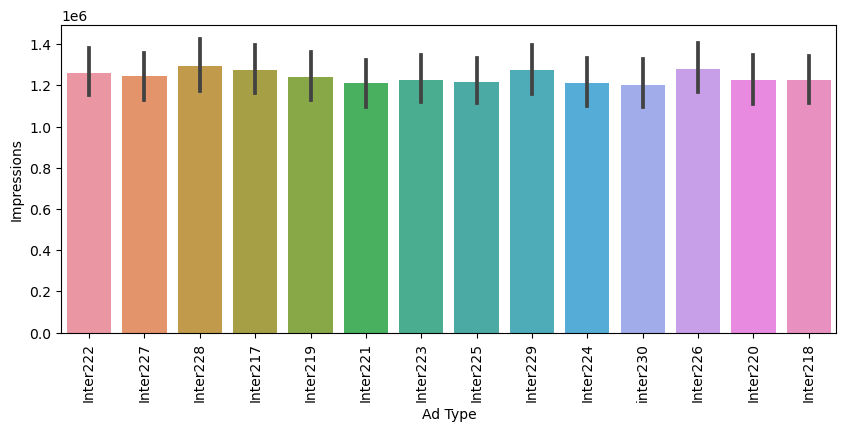

In [341]:
#barplot of impression with Ad Type
plt.figure(figsize=(10,4))
sns.barplot(data=df,y="Impressions",x="Ad Type")
plt.xticks(rotation=90);

impression for every Ad Types are  approximately same

<Axes: xlabel='Device Type', ylabel='CTR'>

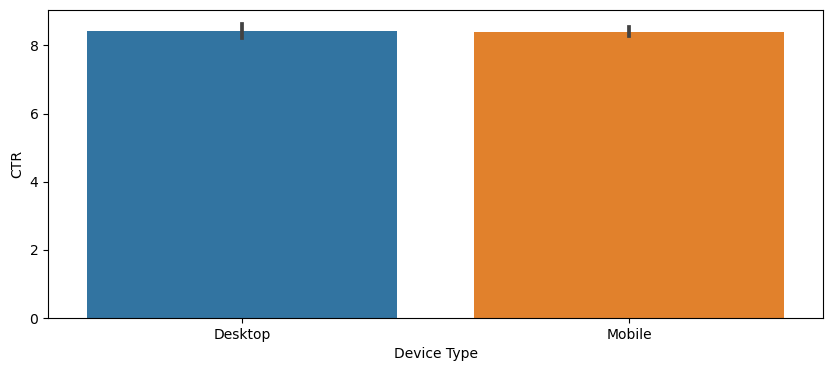

In [342]:
#barplot of CTR with Device Type
plt.figure(figsize=(10,4))
sns.barplot(data=df,y="CTR",x="Device Type")

CTR for both device type are same

<Axes: xlabel='Device Type', ylabel='CPM'>

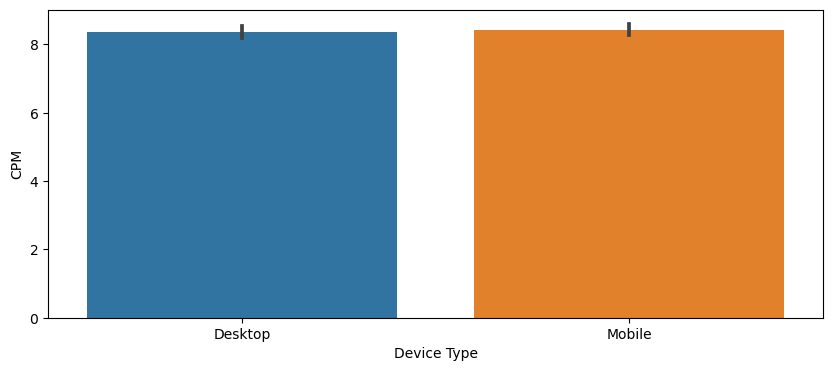

In [343]:
#barplot with CPM with Device Type
plt.figure(figsize=(10,4))
sns.barplot(data=df,y="CPM",x="Device Type")

CPM for both device type are same

<Axes: xlabel='Device Type', ylabel='Clicks'>

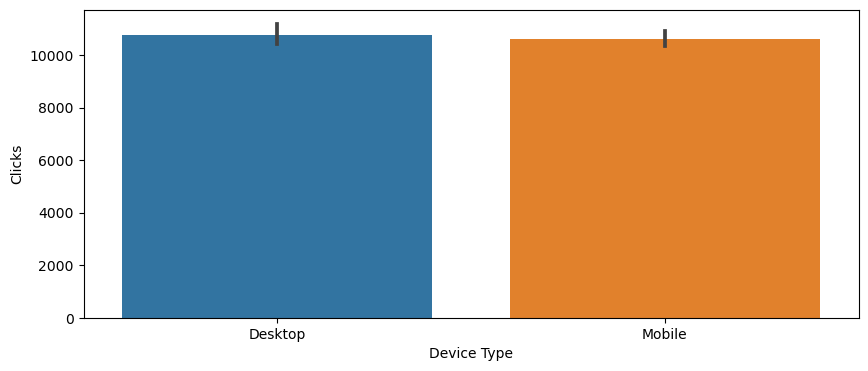

In [344]:
#barplot of clicks with device type
plt.figure(figsize=(10,4))
sns.barplot(data=df,y="Clicks",x="Device Type")

Clicks for both device type are same

#### Key meaningful observations on individual variables and the relationship between variables

#### individual variables

There are 13 numeric fields in the data

Customer ad length ranges from 120 to 728

maximum of Ad_width is 600

Ad size ranges from 33600 to 216000 with an average 7200

Available_Impressions ranges from 1.000000e+00 to 2.759286e+07

only few matched queries above 1.4

Average impression is around 2.252900e+05

more Ads are zero clicks very less ads are more than 80000 Clicks

Spend range is 0.00 to 26931.870000

50%,75%,maximum of fee of Ads is 350000

maximum of Revenue of Ad is 21276.180000

CTR range in between 0.00 to 1.00

maximum of CPM is 81.560000

Range of CPC 0.000 to 7.260000 with average 0.160000

Outliers to be treated

more inventory type is Format1

counts of All Ad Type is approximately same

most count Ad are in video platform,less counts in App platform

mobile device have high Ad than desktop

Format of Ads video type and display type are approximately same

#### relationship between variables
Spend' shows high correlation with 'Available impression','Matched Queries','impression'

"Revenue"shows high correlation with 'Available impression','Matched Queries','impression','Spend'

"Fee"negatively correlated with 'Available impression','Matched Queries','impression','Spend','Revenue'

'CPC'negatively correlated with 'CTR','CPM'

CTR for both device type are same

CPM for both device type are same

Clicks for both device type are same

### Part 1:--2) Clustering: Data Preprocessing
- Missing value check and treatment - Outlier Treatment - z-score scaling Note: Treat missing values in CPC, CTR and CPM using the formula given.

#### 1---2)-a)Missing value check and treatment

In [345]:
#check missing values
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [346]:
#treate missing values with formulas
df.CPM=((df.Spend)/(df.Impressions))*1000
df.CPC=(df.Spend)/(df.Clicks)
df.CTR=((df.Clicks)/(df.Impressions))*100

In [347]:
#after check null values
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

#### 1--2)-b)Check if there are any outliers.

In [348]:
# create data frame with numerical vcolumns
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [349]:
#describe the numerical data frame
df_num.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

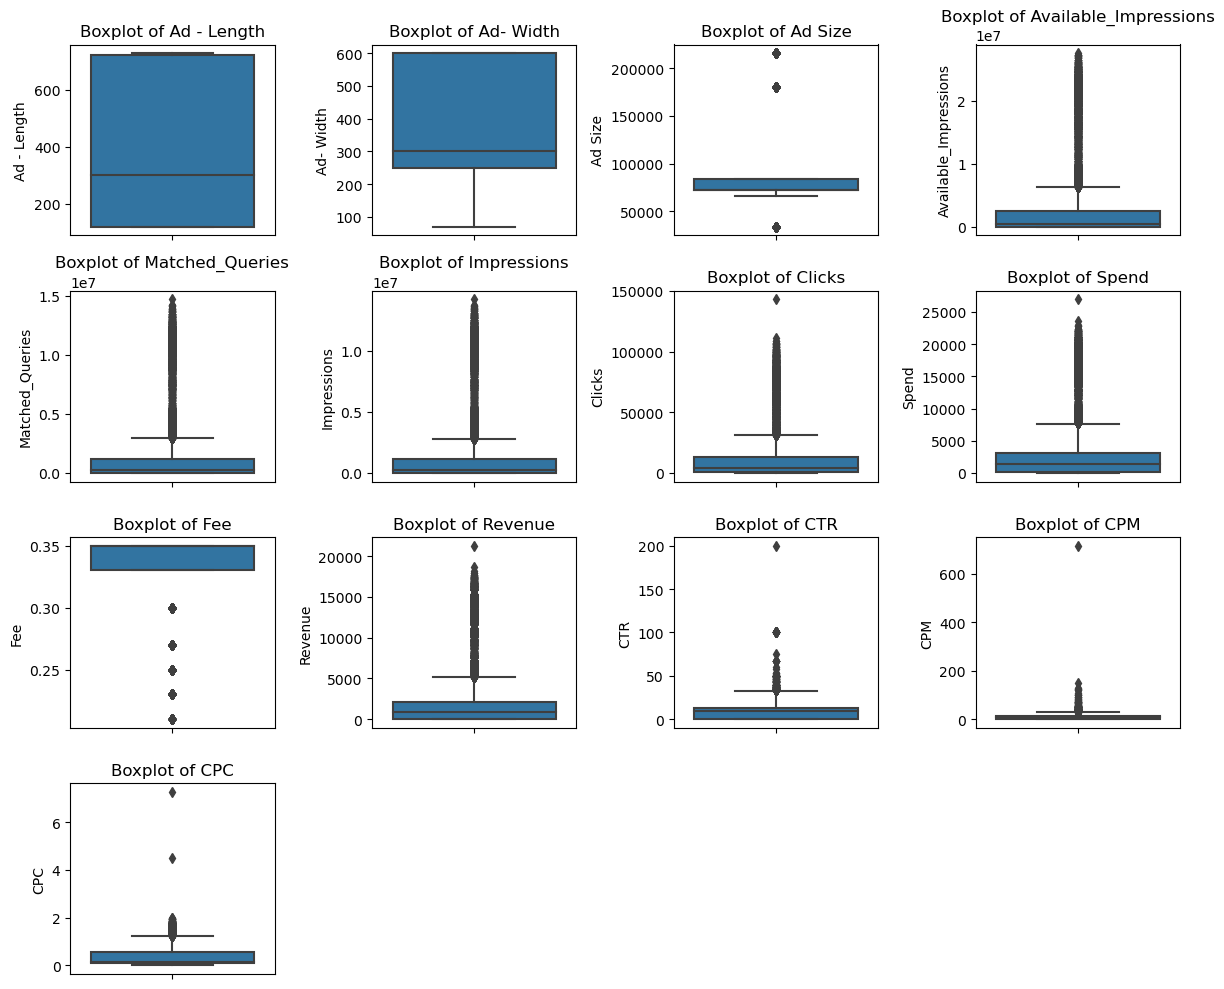

In [350]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [351]:
# treate outliers using IQR method
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [352]:
for i in df_num.columns:
    lw,hi=remove_outlier(df_num[i])
    df_num[i]=np.where(df_num[i]<lw,lw,df_num[i])
    df_num[i]=np.where(df_num[i]>hi,hi,df_num[i])
    

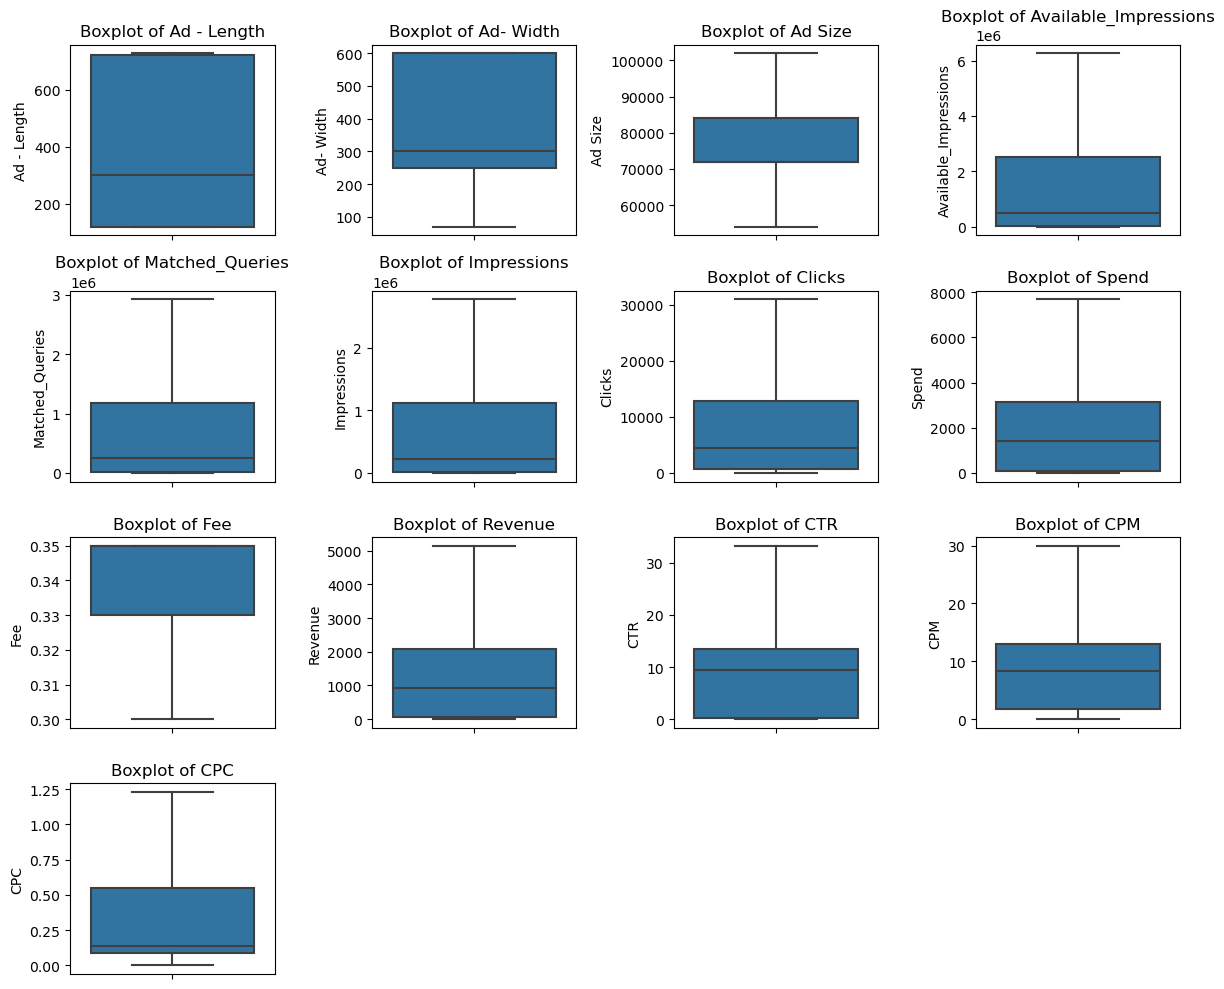

In [353]:
# after checking outliers
plt.figure(figsize = (12,10))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### z-score scaling 

before scaling 

In [354]:
#create data frame with ctegorical columns
#create data frame with numerical columns
df_cat=df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [355]:
#numerical dataframe
df_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0

In [356]:
#describe the numerical data frame
df_num.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

In [357]:
#scaling data frame using z-score method
from scipy.stats import zscore

scaled_df = df_num.apply(zscore)
scaled_df

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0        -0.364496  -0.432797 -0.352218              -0.512407   
1        -0.364496  -0.432797 -0.352218              -0.512413   
2        -0.364496  -0.432797 -0.352218              -0.512213   
3        -0.364496  -0.432797 -0.352218              -0.512276   
4        -0.364496  -0.432797 -0.352218              -0.512531   
...            ...        ...       ...                    ...   
23061     1.433093  -0.186599  1.939086              -0.512788   
23062     1.433093  -0.186599  1.939086              -0.512787   
23063     1.433093  -0.186599  1.939086              -0.512788   
23064    -1.134891   1.290590 -0.400970              -0.512787   
23065     1.433093  -0.186599  1.939086              -0.512788   

       Matched_Queries  Impressions    Clicks     Spend       Fee   Revenue  \
0            -0.515248    -0.510918 -0.615311 -0.665372  0.465447 -0.619693   
1            -0.515264    -0.510933 -0.615311 -0.665372  0.465447 -0.619693   
2            -0.515235    -0.510905 -0.615311 -0.665372  0.465447 -0.619693   
3            -0.515179    -0.510847 -0.615311 -0.665372  0.465447 -0.619693   
4            -0.515281    -0.510951 -0.615311 -0.665372  0.465447 -0.619693   
...                ...          ...       ...       ...       ...       ...   
23061        -0.515377    -0.511050 -0.615311 -0.665355  0.465447 -0.619678   
23062        -0.515376    -0.511050 -0.615311 -0.665362  0.465447 -0.619684   
23063        -0.515377    -0.511050 -0.615311 -0.665360  0.465447 -0.619682   
23064        -0.515377    -0.511050 -0.615311 -0.665355  0.465447 -0.619678   
23065        -0.515376    -0.511050 -0.615311 -0.665350  0.465447 -0.619674   

            CTR       CPM       CPC  
0     -0.874593 -0.927054 -0.986615  
1     -0.870136 -0.927054 -0.986615  
2     -0.877606 -0.927054 -0.986615  
3     -0.886208 -0.927054 -0.986615  
4     -0.863404 -0.927054 -0.986615  
...         ...       ...       ...  
23061  9.888962  6.801294 -0.781484  
23062  4.490471  1.281046 -0.869397  
23063  9.888962  4.593195 -0.840092  
23064  9.888962  6.801294 -0.781484  
23065  4.490471  4.041170 -0.722875  

[23066 rows x 13 columns]

after describe the statical summary 

In [358]:
#describe the scaled data frame
scaled_df.describe().T

count          mean       std       min       25%  \
Ad - Length            23066.0  1.281478e-16  1.000022 -1.134891 -1.134891   
Ad- Width              23066.0 -1.182903e-16  1.000022 -1.319110 -0.432797   
Ad Size                23066.0  2.464381e-17  1.000022 -1.024985 -0.400970   
Available_Impressions  23066.0 -1.971505e-17  1.000022 -0.512788 -0.505688   
Matched_Queries        23066.0 -5.914515e-17  1.000022 -0.515377 -0.508102   
Impressions            23066.0 -1.971505e-17  1.000022 -0.511050 -0.507761   
Clicks                 23066.0 -3.943010e-17  1.000022 -0.615311 -0.574454   
Spend                  23066.0 -3.943010e-17  1.000022 -0.665372 -0.644432   
Fee                    23066.0  6.703117e-16  1.000022 -3.914682 -0.160285   
Revenue                23066.0  7.886020e-17  1.000022 -0.619693 -0.601863   
CTR                    23066.0 -4.928763e-17  1.000022 -0.906846 -0.879396   
CPM                    23066.0 -6.900268e-17  1.000022 -0.927054 -0.733946   
CPC                    23066.0 -1.182903e-16  1.000022 -0.986615 -0.723649   

                            50%       75%        max  
Ad - Length           -0.364496  1.433093   1.467332  
Ad- Width             -0.186599  1.290590   1.290590  
Ad Size               -0.400970 -0.205965   1.939086  
Available_Impressions -0.410787  0.020171   5.305072  
Matched_Queries       -0.412673 -0.045524   5.335208  
Impressions           -0.418314 -0.053138   5.331990  
Clicks                -0.360370  0.121894   7.628089  
Spend                 -0.315032  0.101964   5.955310  
Fee                    0.465447  0.465447   0.465447  
Revenue               -0.321373  0.053809   6.232161  
CTR                    0.105952  0.546395  20.685944  
CPM                   -0.002791  0.512850  78.012500  
CPC                   -0.578265  0.614117  20.300124

### Part 1:--3) Clustering: Hierarchical Clustering
- Construct a dendrogram using Ward linkage and Euclidean distance - Identify the optimum number of Clusters


#### 1---3-a)-Construct a dendrogram using Ward linkage and Euclidean distance

In [359]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [360]:
#scaled data with ward linkage and eucliden distannce 
ward_link=linkage(scaled_df,method="ward", metric='euclidean')

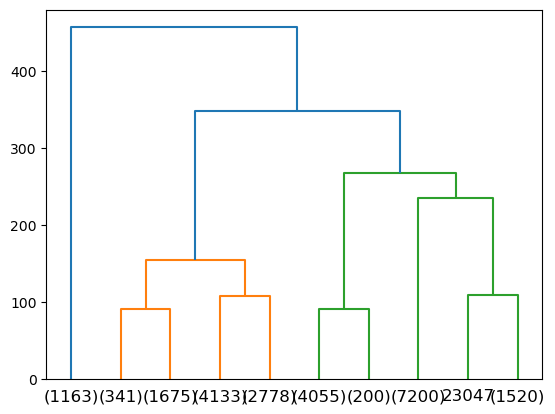

In [361]:
#plot dendrograme
dend = dendrogram(ward_link,
                 truncate_mode='lastp',
                 p = 10
                 )

#### 1-3-b) Identify the optimum number of Clusters

In this example, you might decide to cut the dendrogram at a certain height (horizontal line) where the vertical lines are longest, and you would consider the number of clusters as the number of branches you've crossed.
we can extract the optimal number of clusters by looking dendrogram.By looking at the dendrogram ,we can say that the optimmal number of clusters is 2.because the vertical distance is high for 2 clusters 
###### Optimum number of clusters=2

## Part 1--4)-: Clustering: K-means Clustering
- Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out the appropriate number of clusters - Cluster Profiling

#### 1--4--a)Apply K-means Clustering 

Elbow plot(up to n=10)

In [362]:
#Elbow plot(up to n=10)
from sklearn.cluster import KMeans
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1,n_init=10)
    KM.fit(scaled_df)
    wss.append(round(KM.inertia_,2))

In [363]:
wss

[299858.0,
 188281.49,
 130712.22,
 94685.77,
 66289.08,
 55262.54,
 49134.2,
 44094.3,
 40161.91,
 34878.56]

#### 1--4-b)-Plot the Elbow curve

In [364]:
a=[1,2,3,4,5,6,7,8,9,10]

Text(0, 0.5, '(WSS)')

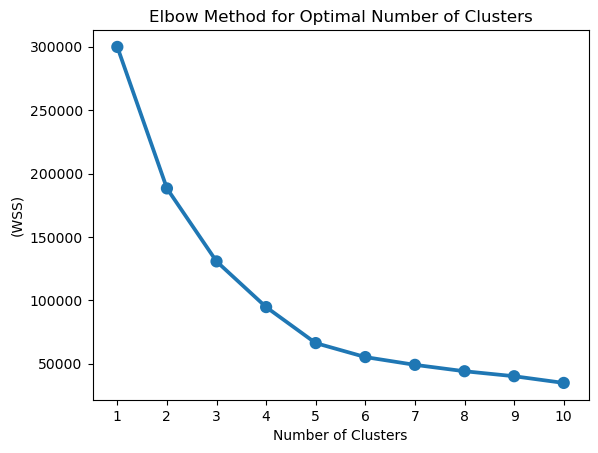

In [365]:
# Create a point plot
sns.pointplot(x=a, y=wss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('(WSS)')


We can see from the plot that there is a consistent dip from 2 to 10 and there doesn't seem to be a clear 'elbow' here. We may chose any from 2 to 8 as our # of clusters.
So, let's look at another method to get a 'second opinion from maths'. Let's create a plot with Silhouette scores to see how it varies with k.

#### 1-4-c)-Check Silhouette Scores 

Let us now find the Silhouette Score for the values of K from 2 to 10

In [366]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
silhouette_scores = []
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters,n_init=10)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    silhouette_scores.append(silhouette_avg)

For n_clusters=2, the silhouette score is 0.6122159547090302
For n_clusters=3, the silhouette score is 0.38939835242959714
For n_clusters=4, the silhouette score is 0.5033463240941357
For n_clusters=5, the silhouette score is 0.557117025455947
For n_clusters=6, the silhouette score is 0.5291811252973383
For n_clusters=7, the silhouette score is 0.5367029944777137
For n_clusters=8, the silhouette score is 0.5381765938866728
For n_clusters=9, the silhouette score is 0.5531121077559789
For n_clusters=10, the silhouette score is 0.5534060301063022


#### 1-4-d)Figure out the appropriate number of clusters 

Text(0.5, 1.0, 'Silhouette Score for Optimal Number of Clusters')

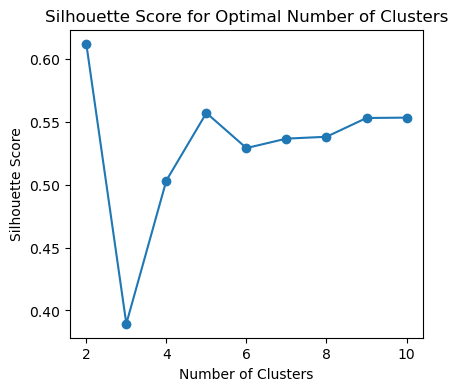

In [367]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')

#### 1--4--e)Cluster Profiling


###### Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
###### [Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

We can see from the plot that silhouette score is highest for k=2. Well that makes it slightly easy for us and we can start with first understanding these 2 clusters. So let's take the number of clusters as 2.

In [369]:
#let's take the number of clusters as 2.
kmeans = KMeans(n_clusters=2, random_state=1,n_init=10)
kmeans.fit(scaled_df)


KMeans(n_clusters=2, n_init=10, random_state=1)

In [370]:
#Adding predicted labels to the original data and scaled data 
scaled_df['KMeans_Labels'] = kmeans.predict(scaled_df)
df['KMeans_Labels'] = kmeans.predict(scaled_df)
df_num['KMeans_Labels'] = kmeans.predict(scaled_df)

In [371]:
#counts for clusters
df['KMeans_Labels'].value_counts()

0    21580
1     1486
Name: KMeans_Labels, dtype: int64

##### Observations:

This looks like a very skewed clustering . Let's check out the profiles of these clusters

In [372]:
#Calculating mean and median of the original data for each label
mean = df_num.groupby('KMeans_Labels').mean()
median = df_num.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_0 Median', 'group_1 Median']
df_kmeans.T

group_0 Mean  group_1 Mean  group_0 Median  \
Ad - Length            3.645779e+02  6.841050e+02      300.000000   
Ad- Width              3.531738e+02  1.160296e+02      300.000000   
Ad Size                9.852045e+04  6.986673e+04    72000.000000   
Available_Impressions  1.349530e+06  1.815254e+07   408718.000000   
Matched_Queries        7.173359e+05  9.685496e+06   221739.000000   
Impressions            6.848326e+05  9.325842e+06   188945.500000   
Clicks                 1.019593e+04  1.768678e+04     3912.000000   
Spend                  1.818878e+03  1.559868e+04     1299.980000   
Fee                    3.417966e-01  2.382100e-01        0.350000   
Revenue                1.234364e+03  1.194295e+04      844.985000   
CTR                    8.976118e+00  1.878036e-01       10.178568   
CPM                    8.857767e+00  1.703308e+00        9.106158   
CPC                    2.968454e-01  9.151287e-01        0.127471   

                       group_1 Median  
Ad - Length              7.280000e+02  
Ad- Width                9.000000e+01  
Ad Size                  6.552000e+04  
Available_Impressions    1.894390e+07  
Matched_Queries          1.024037e+07  
Impressions              9.857084e+06  
Clicks                   1.896250e+04  
Spend                    1.607917e+04  
Fee                      2.300000e-01  
Revenue                  1.238096e+04  
CTR                      1.904888e-01  
CPM                      1.667699e+00  
CPC                      8.573520e-01

#### Observations:

It looks like Cluster 1  with high impression and CPC, Cluster 0 is of less impression,CPC than cluster 1 .

###### Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

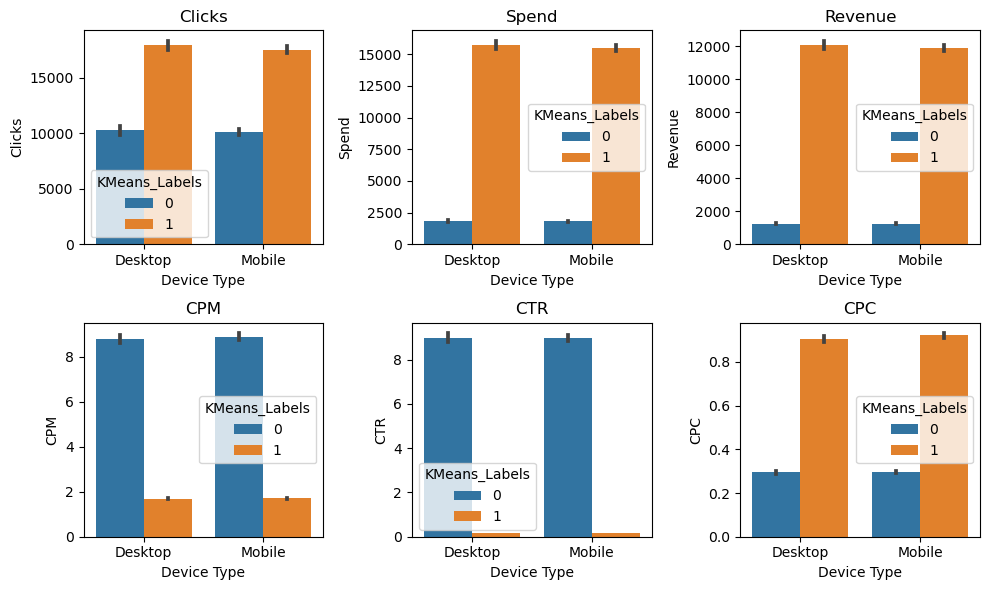

In [76]:
cols_visualise = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Flatten the 2D array of axes into a 1D array for easy iteration
axes = axes.flatten()

# Iterate over each column and create a bar plot in a subplot
for i, col in enumerate(cols_visualise):
    sns.barplot(x="Device Type", y=col, data=df, hue="KMeans_Labels", ax=axes[i])
    axes[i].set_title(col)  # Set subplot title

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

Conclude the project by providing summary of your learnings.

* There are 23066 rows and 19 columns into the dataset.

* There are no duplicated values in data frame.

* There are 4736 null values in CTR,CPM,CPC columns.

* I have treated missing values in CPC,CTR,CPM columns using the given formula

* It seems thet there are outliers into the dataset

* We treated outliers using IQR method

* I have applied z-score metod on data frame  for scaling .

* I  have plotted Dendrogram for value of P=10

* plotted elbow plot and got the optimum value of cluster is 2.

* As per Elbow plot/scree plot ,we conclude that the optimal nummber of clusters should be 5.

* I have create 2 clusters  for the data set.

##### conclusion after clustering ``

* When clicks on Ads gets increases then revenue is also increases.

* When amount of money spent on specific Ad variation within a specific campaign or ad set is increases then revenue is also increases.

* when impression count of the particular Advertisement increasa then revenue is also increases.

* the clicks for both device type have approximately same in both clusters.
* all variables are same in both devices type.
* click,spend,revenue,cpc are high in cluster 1 type.
* CPM and CTR are high in cluster 0 type .

## Problem 2:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

Note: The 24 variables given in the Rubric is just for performing EDA. You will have to consider the entire dataset, including all the variables for performing PCA. 
Data file - PCA India Data Census.xlsx

### 2-1: PCA: Define the problem and perform Exploratory Data Analysis
- Problem Definition - Check shape, Data types, statistical summary - Perform an EDA on the data to extract useful insights Note: 1. Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 2. Example questions to answer from EDA - (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio?


#### ANSWER

In [376]:
#read the data set
dx=pd.read_excel("PCA India Data_Census.xlsx")
dx.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

##### 2-1-b) Check shape

In [377]:
dx.shape

(640, 61)

#### 2-1-c) Data types

In [378]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

#### 2-1-d)statistical summary 

In [379]:
dx.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  310450.000000  485417.000000  750392.000000   

               M_06          F_06           M_SC           F_SC          M_ST  \
count    640.000000    640.000000     640.000000     640.000000    640.000000   
mean   12309.098438  11942.300000   13820.946875   20778.392188   6191.807813   
std    11500.906881  11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000     56.000000       0.000000       0.000000      0.000000   
25%     4733.750000   4672.250000    3466.250000    5603.250000    293.750000   
50%     9159.000000   8663.000000    9591.500000   13709.000000   2333.500000   
75%    16520.250000  15902.250000   19429.750000   29180.000000   7658.000000   
max    96223.000000  95129.000000  103307.000000  156429.000000  96785.000000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1392.973438    2757.050000     250.889062     558.098438   
std    ...    1489.707052    2788.776676     453.336594    1117.642748   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    9875.000000   21611.000000    5775.000000   17153.000000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      560.690625    1293.431250      71.379688     200.742188   
std       762.578991    1585.377936     107.897627     309.740854   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      6116.000000   13714.000000     895.000000    3354.000000   

        NON_WORK_M    NON_WORK_F  
count   640.000000    640.000000  
mean    510.014063    704.778125  
std     610.603187    910.209225  
min       0.000000      5.000000  
25%     161.000000    220.500000  
50%     326.000000    464.500000  
75%     604.500000    853.500000  
max    6456.000000  10533.000000  

[8 rows x 59 columns]

#### 2-1-e)-Perform an EDA on the data to extract useful insights Note:

##### 2-1-e)-1    . Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 

###### Answers

I have picked 5 variables such as TOT_M, TOT_F, M_LIT, F_LIT and TOT_WORK_M and comparing  those 5 variables aganist "state","Dist.code"

TOT_M-total population male

TOT_F-total population female

M_LIT-literates population male

F_LIT-literates popuation female

TOT_WORK_M-total work population male

State-state code

District-district code

##### 2-1-e)-2  . Example questions to answer from EDA -
(i) Which state has highest gender ratio and which has the lowest?

(ii) Which district has the highest & lowest gender ratio?

##### Answers:

###### 2-1-e)2-(i) Which state has highest gender ratio and which has the lowest?

using the bar plot we can find which state has highest gender ratio and which has the lowest

In [380]:
dx["gend_ratio"]=(dx.TOT_F/dx.TOT_M)*1000

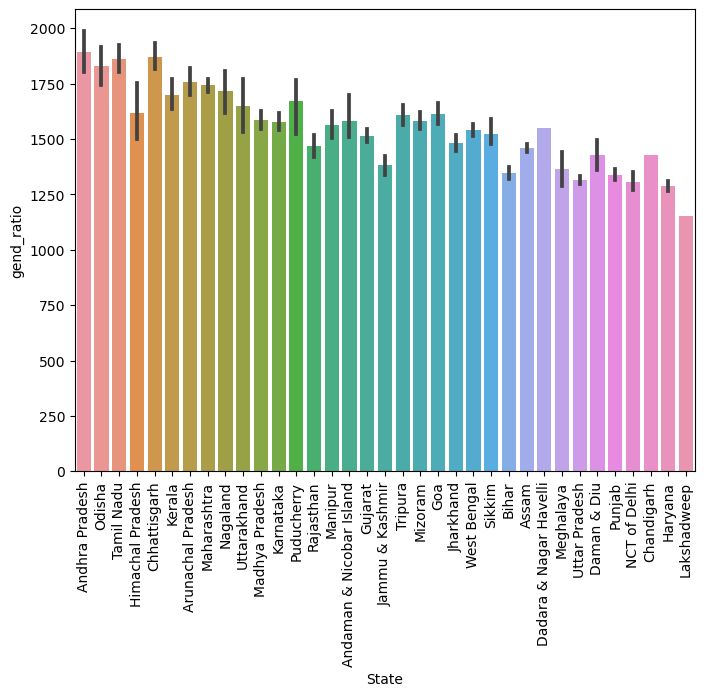

In [381]:
plt.figure(figsize=(8,6))
dx_sorted = dx.sort_values(by="gend_ratio", ascending=False)
sns.barplot(data=dx_sorted,x="State", y="gend_ratio")
plt.xticks(rotation=90);

In [382]:
dx_sorted["State"]

546     Andhra Pradesh
397             Odisha
624         Tamil Nadu
545     Andhra Pradesh
390             Odisha
            ...       
138      Uttar Pradesh
105          Rajasthan
143      Uttar Pradesh
1      Jammu & Kashmir
586        Lakshadweep
Name: State, Length: 640, dtype: object

Andhra pradesh state have higest gender ratio

Lakshadweep  state have lowest gender ratio

##### 2-1-e)2-(ii) Which district has the highest & lowest gender ratio?

In [383]:
plt.figure(figsize=(17,6))
dx_sor= dx.sort_values(by="gend_ratio", ascending=False)
dx_sor

State Code  Dist.Code            State       Area Name   No_HH   TOT_M  \
546          28        547   Andhra Pradesh         Krishna  182404  137603   
397          21        398           Odisha         Koraput   46307   38026   
624          33        625       Tamil Nadu    Virudhunagar   90241   66704   
545          28        546   Andhra Pradesh   West Godavari  163437  123111   
390          21        391           Odisha           Baudh   10665    8672   
..          ...        ...              ...             ...     ...     ...   
138           9        139    Uttar Pradesh         Baghpat   21966   54807   
105           8        106        Rajasthan        Dhaulpur   15153   31904   
143           9        144    Uttar Pradesh  Mahamaya Nagar   27728   67258   
1             1          2  Jammu & Kashmir          Badgam    6218   19585   
586          31        587      Lakshadweep     Lakshadweep    4445   12823   

      TOT_F   M_06   F_06   M_SC  ...  MARG_CL_0_3_F  MARG_AL_0_3_M  \
546  314182  14373  13978  31646  ...           4496             18   
397   86272   6282   6436   5676  ...           4038            184   
624  148445   7187   6645  14191  ...           2014              5   
545  273534  13098  12795  30401  ...           4465             17   
390   19209   1074   1109   2136  ...            935             21   
..      ...    ...    ...    ...  ...            ...            ...   
138   64937   9586   8537   7081  ...            794             84   
105   37671   5384   4867   8468  ...           2191            764   
143   79378  11389  10473  17558  ...           1816            103   
1     23102   4482   3733      7  ...            715            123   
586   14772   1719   1587      0  ...            359              0   

     MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
546             80            518           2961             52   
397            433            588           2689             25   
624             40            144            925             27   
545             38            554           3037             26   
390             52            152            622             13   
..             ...            ...            ...            ...   
138            172            149            255             32   
105            810            366            546             31   
143            165            791            953            123   
1              229            186            148             76   
586              0              0              0             13   

     MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F   gend_ratio  
546            189         462        1266  2283.249638  
397            114         326         802  2268.763478  
624            205         331         844  2225.428760  
545            225         352        1165  2221.848576  
390             82          69         179  2215.059963  
..             ...         ...         ...          ...  
138             53         303         314  1184.830405  
105             60         486         775  1180.761033  
143            207         392         491  1180.201612  
1              178         140         160  1179.576206  
586              7         749         352  1151.992513  

[640 rows x 62 columns]

<Figure size 1700x600 with 0 Axes>

In [384]:
dx_sor["Area Name"]

546           Krishna
397           Koraput
624      Virudhunagar
545     West Godavari
390             Baudh
            ...      
138           Baghpat
105          Dhaulpur
143    Mahamaya Nagar
1              Badgam
586       Lakshadweep
Name: Area Name, Length: 640, dtype: object

krishna have high gender ratio

lakshadweep have low gender ratio

### Part 2-2: PCA: Data Preprocessing
- Check for and treat (if needed) missing values - Check for and treat (if needed) data irregularities - Scale the Data using the z-score method - Visualize the data before and after scaling and comment on the impact on outliers

##### 2-2-a)Check for and treat (if needed) missing values

In [385]:
dx.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
gend_ratio       0
Length: 62, dtype: int64

there is no null values in the dataset

###### 2-2-b)Check for and treat (if needed) data irregularities
    

In [386]:
df.duplicated().sum()

0

there is no duplicated values in the data set

In [387]:
dx.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  310450.000000  485417.000000  750392.000000   

               M_06          F_06           M_SC           F_SC          M_ST  \
count    640.000000    640.000000     640.000000     640.000000    640.000000   
mean   12309.098438  11942.300000   13820.946875   20778.392188   6191.807813   
std    11500.906881  11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000     56.000000       0.000000       0.000000      0.000000   
25%     4733.750000   4672.250000    3466.250000    5603.250000    293.750000   
50%     9159.000000   8663.000000    9591.500000   13709.000000   2333.500000   
75%    16520.250000  15902.250000   19429.750000   29180.000000   7658.000000   
max    96223.000000  95129.000000  103307.000000  156429.000000  96785.000000   

       ...  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    2757.050000     250.889062     558.098438     560.690625   
std    ...    2788.776676     453.336594    1117.642748     762.578991   
min    ...      30.000000       0.000000       0.000000       0.000000   
25%    ...     957.250000      47.000000     109.000000     136.500000   
50%    ...    1928.000000     114.500000     247.500000     308.000000   
75%    ...    3599.750000     270.750000     568.750000     642.000000   
max    ...   21611.000000    5775.000000   17153.000000    6116.000000   

       MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F   NON_WORK_M    NON_WORK_F  \
count     640.000000     640.000000     640.000000   640.000000    640.000000   
mean     1293.431250      71.379688     200.742188   510.014063    704.778125   
std      1585.377936     107.897627     309.740854   610.603187    910.209225   
min         0.000000       0.000000       0.000000     0.000000      5.000000   
25%       298.000000      14.000000      43.000000   161.000000    220.500000   
50%       717.000000      35.000000     113.000000   326.000000    464.500000   
75%      1710.750000      79.000000     240.000000   604.500000    853.500000   
max     13714.000000     895.000000    3354.000000  6456.000000  10533.000000   

        gend_ratio  
count   640.000000  
mean   1553.534740  
std     229.059416  
min    1151.992513  
25%    1369.431933  
50%    1517.920827  
75%    1704.348666  
max    2283.249638  

[8 rows x 60 columns]

In [388]:
dx[dx["State"]=="Nan"]

Empty DataFrame
Columns: [State Code, Dist.Code, State, Area Name, No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F, MARGWORK_M, MARGWORK_F, MARG_CL_M, MARG_CL_F, MARG_AL_M, MARG_AL_F, MARG_HH_M, MARG_HH_F, MARG_OT_M, MARG_OT_F, MARGWORK_3_6_M, MARGWORK_3_6_F, MARG_CL_3_6_M, MARG_CL_3_6_F, MARG_AL_3_6_M, MARG_AL_3_6_F, MARG_HH_3_6_M, MARG_HH_3_6_F, MARG_OT_3_6_M, MARG_OT_3_6_F, MARGWORK_0_3_M, MARGWORK_0_3_F, MARG_CL_0_3_M, MARG_CL_0_3_F, MARG_AL_0_3_M, MARG_AL_0_3_F, MARG_HH_0_3_M, MARG_HH_0_3_F, MARG_OT_0_3_M, MARG_OT_0_3_F, NON_WORK_M, NON_WORK_F, gend_ratio]
Index: []

[0 rows x 62 columns]

In [389]:
dx["State"].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [390]:
dx["State"].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [391]:
#drop the State Code","Dist.Code","State","Area Name","gend_ratio"]
dx_new= dx.drop(["State Code","Dist.Code","State","Area Name","gend_ratio"], axis = 1)
dx_new.columns

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

#### 2-2-c)scaling data using z-score method

In [392]:
from scipy.stats import zscore

scaled_dx =dx_new.apply(zscore)
scaled_dx

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1   -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2   -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3   -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4   -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   
..        ...       ...       ...       ...       ...       ...       ...   
635 -0.995677 -0.978990 -0.974268 -0.971387 -0.948916 -0.957326 -0.955667   
636 -0.844340 -0.921822 -0.886965 -0.936754 -0.919757 -0.803806 -0.765670   
637 -1.038465 -1.069066 -1.054885 -1.051356 -1.035331 -0.958783 -0.957049   
638 -0.986758 -1.019276 -1.007472 -1.008195 -0.996541 -0.958783 -0.957049   
639 -0.899166 -0.926854 -0.919050 -0.943193 -0.935220 -0.958783 -0.957049   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0   -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1   -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2   -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3   -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4    0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   
..        ...       ...       ...  ...            ...            ...   
635 -0.625124 -0.640197 -0.913820  ...      -0.914299      -0.972530   
636 -0.625124 -0.640197 -0.853390  ...      -0.831668      -0.868461   
637 -0.522953 -0.529880 -1.016367  ...      -0.865930      -0.941309   
638 -0.622297 -0.637046 -0.962328  ...      -0.844432      -0.927673   
639 -0.608870 -0.623555 -0.856916  ...      -0.819576      -0.945616   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0        -0.156494      -0.287524       0.156577      -0.657412   
1        -0.282327      -0.294688      -0.491731      -0.723062   
2        -0.456727      -0.420050      -0.731894      -0.795026   
3        -0.419198      -0.385127      -0.718770      -0.784926   
4         0.472670       0.434200      -0.466796      -0.625849   
..             ...            ...            ...            ...   
635      -0.553861      -0.499744      -0.735831      -0.816489   
636      -0.547238      -0.487208      -0.685961      -0.734425   
637      -0.533992      -0.496162      -0.733206      -0.812701   
638      -0.500878      -0.460344      -0.721395      -0.803232   
639      -0.540615      -0.497953      -0.713521      -0.805757   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        -0.365258      -0.499977   -0.413053   -0.539614  
1         0.042855      -0.073481   -0.606455   -0.598988  
2        -0.662068      -0.635680   -0.726103   -0.707839  
3        -0.624966      -0.616294   -0.645791   -0.710038  
4        -0.439461      -0.309346   -0.540895   -0.249344  
..             ...            ...         ...         ...  
635      -0.662068      -0.648604   -0.783468   -0.723232  
636      -0.624966      -0.574290   -0.655625   -0.587993  
637      -0.504388      -0.496746   -0.711352   -0.690247  
638      -0.652792      -0.635680   -0.672015   -0.661660  
639      -0.643517      -0.635680   -0.593343   -0.666058  

[640 rows x 57 columns]

#### 2-2-4)Visualize the data before and after scaling and comment on the impact on outliers

In [394]:
dx_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

###### before scaling 

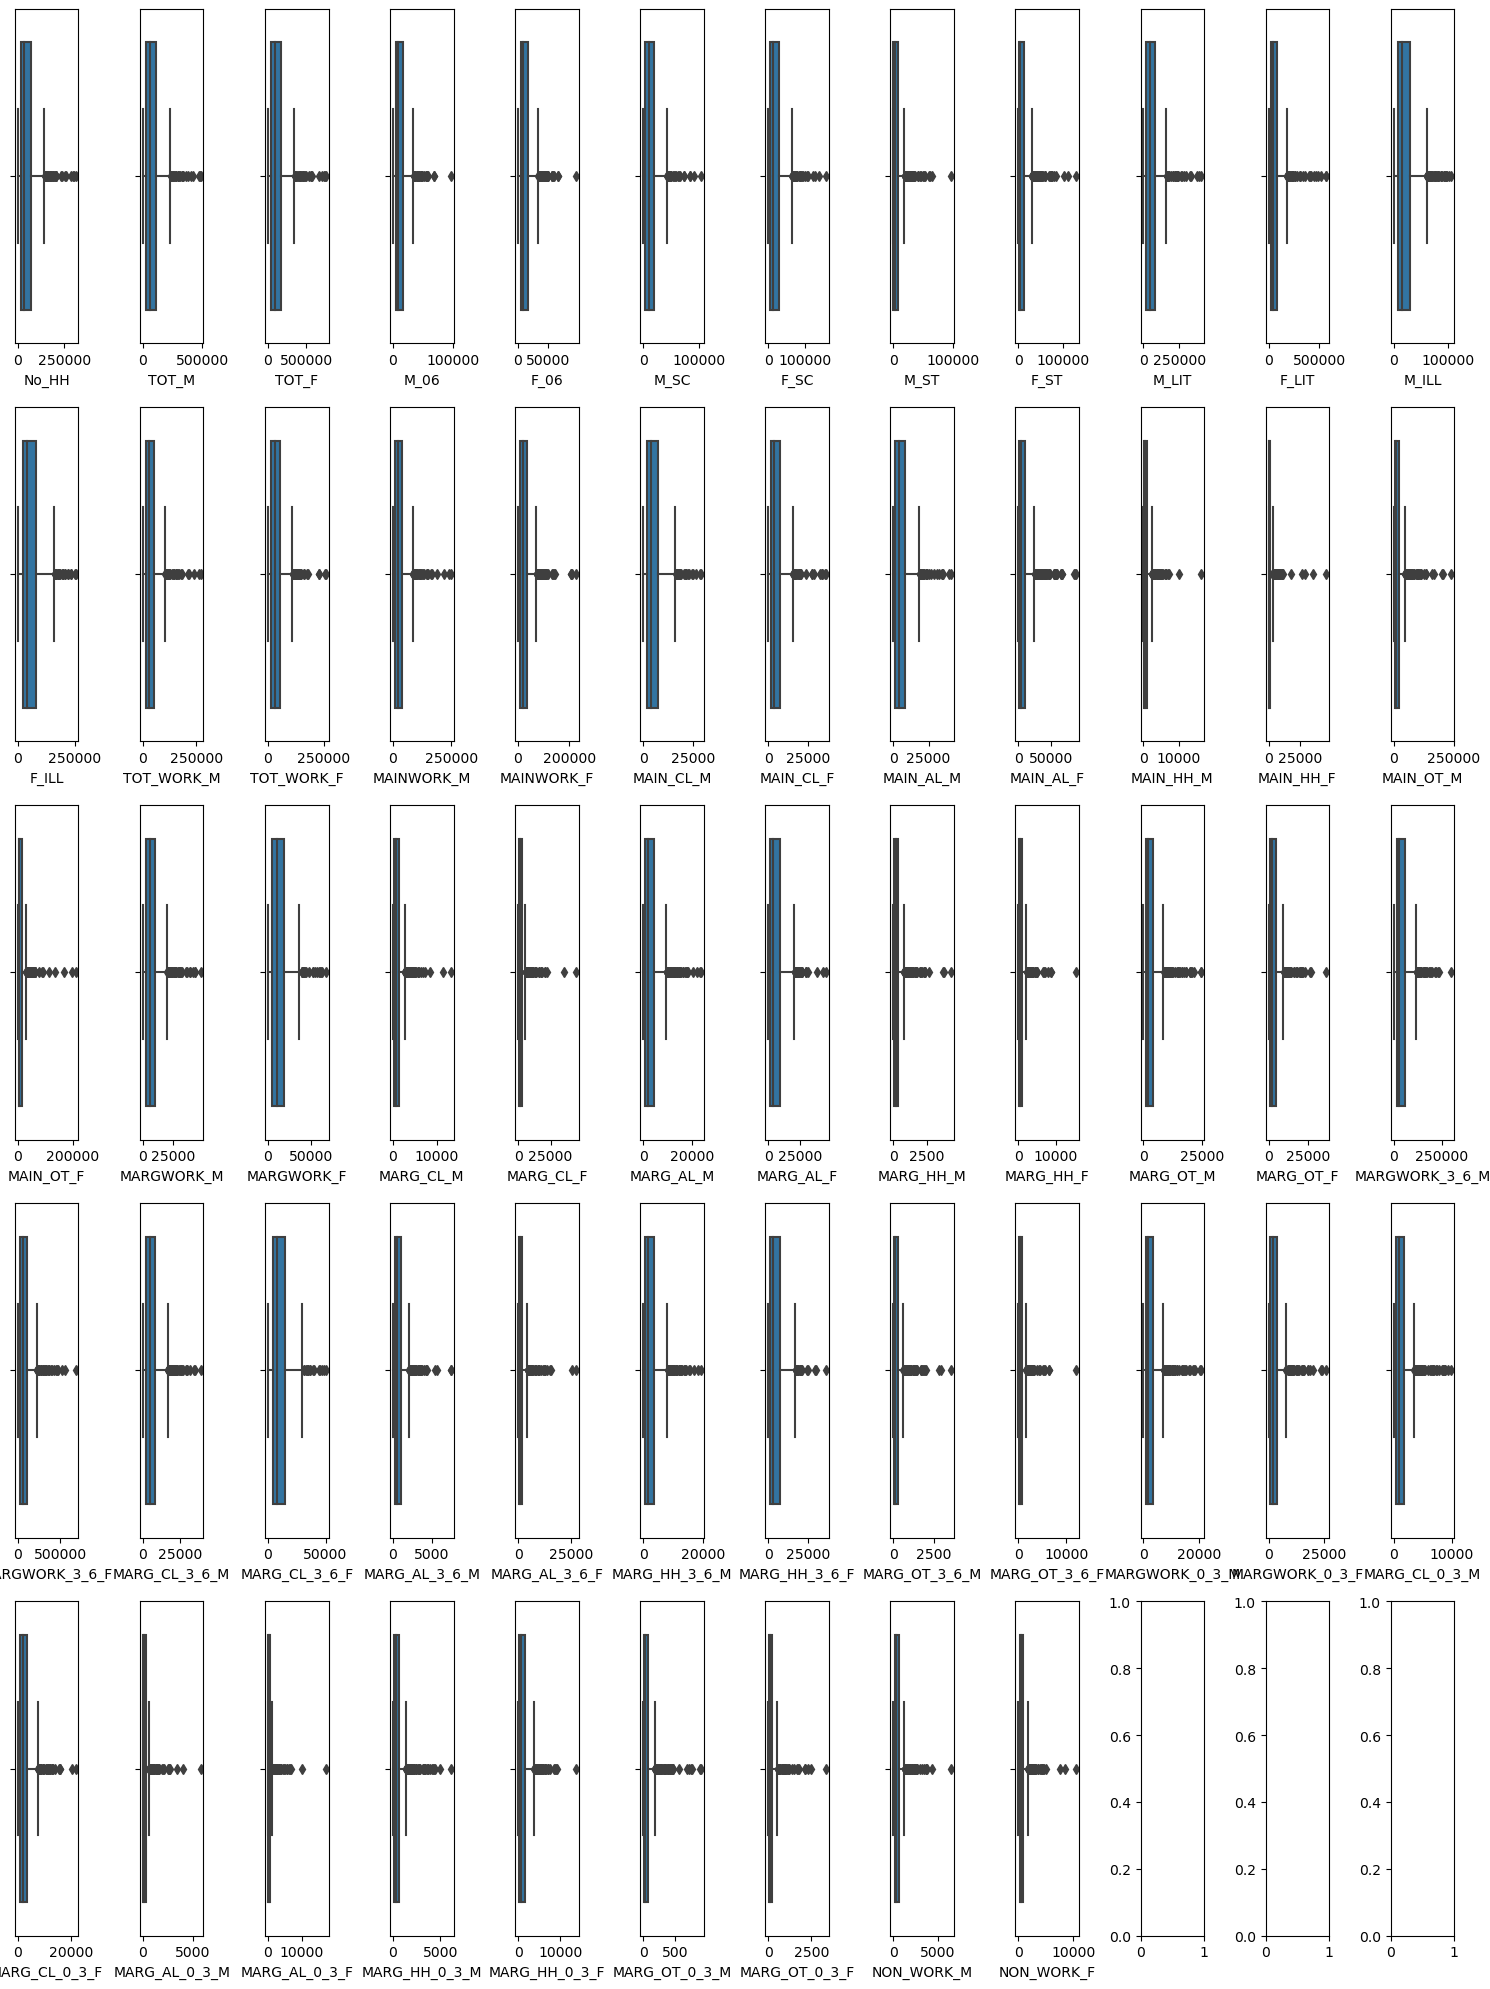

In [395]:
# Assuming dx_new is your DataFrame
columns = dx_new.columns
num_rows = 5
num_cols = 12

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, column in enumerate(columns):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.boxplot(x=dx_new[column], ax=ax)
    

plt.tight_layout()
plt.show()

##### After scaling

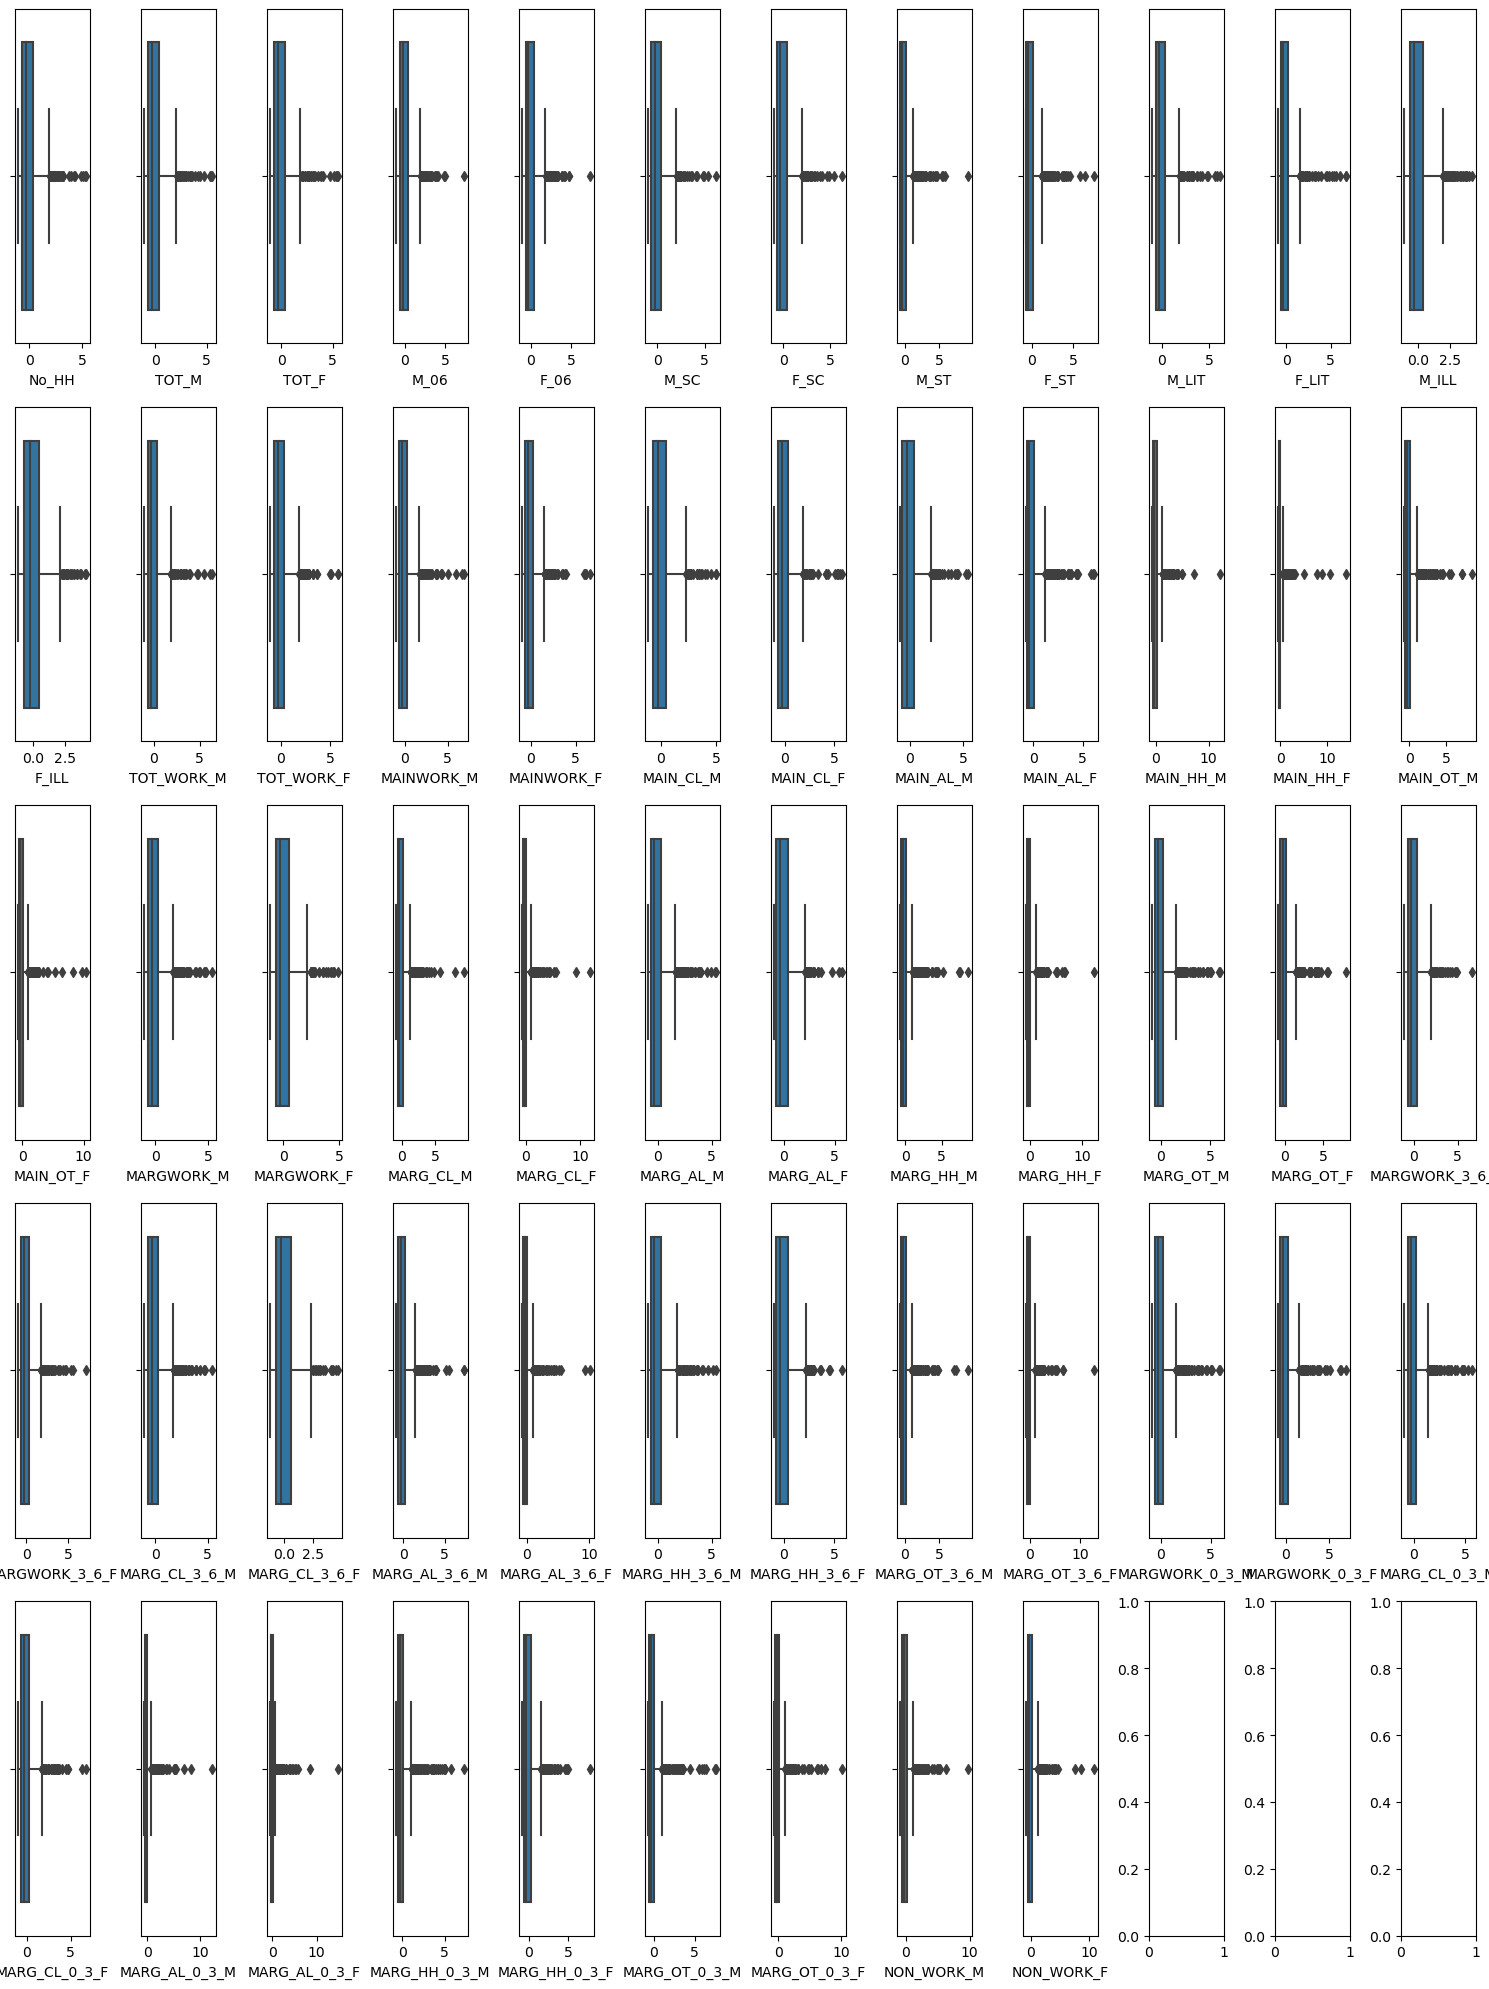

In [396]:
# Assuming dx_new is your DataFrame
columns = dx_new.columns
num_rows = 5
num_cols = 12

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, column in enumerate(columns):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.boxplot(x=scaled_dx[column], ax=ax)
plt.tight_layout()
plt.show()

 the range of the outliers changes after the  scaling.

##### treat the outliers

In [397]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [398]:
for i in dx_num.columns:
    lw,hi=remove_outlier(dx_num[i])
    dx_num[i]=np.where(dx_num[i]<lw,lw,dx_num[i])
    dx_num[i]=np.where(dx_num[i]>hi,hi,dx_num[i])
    

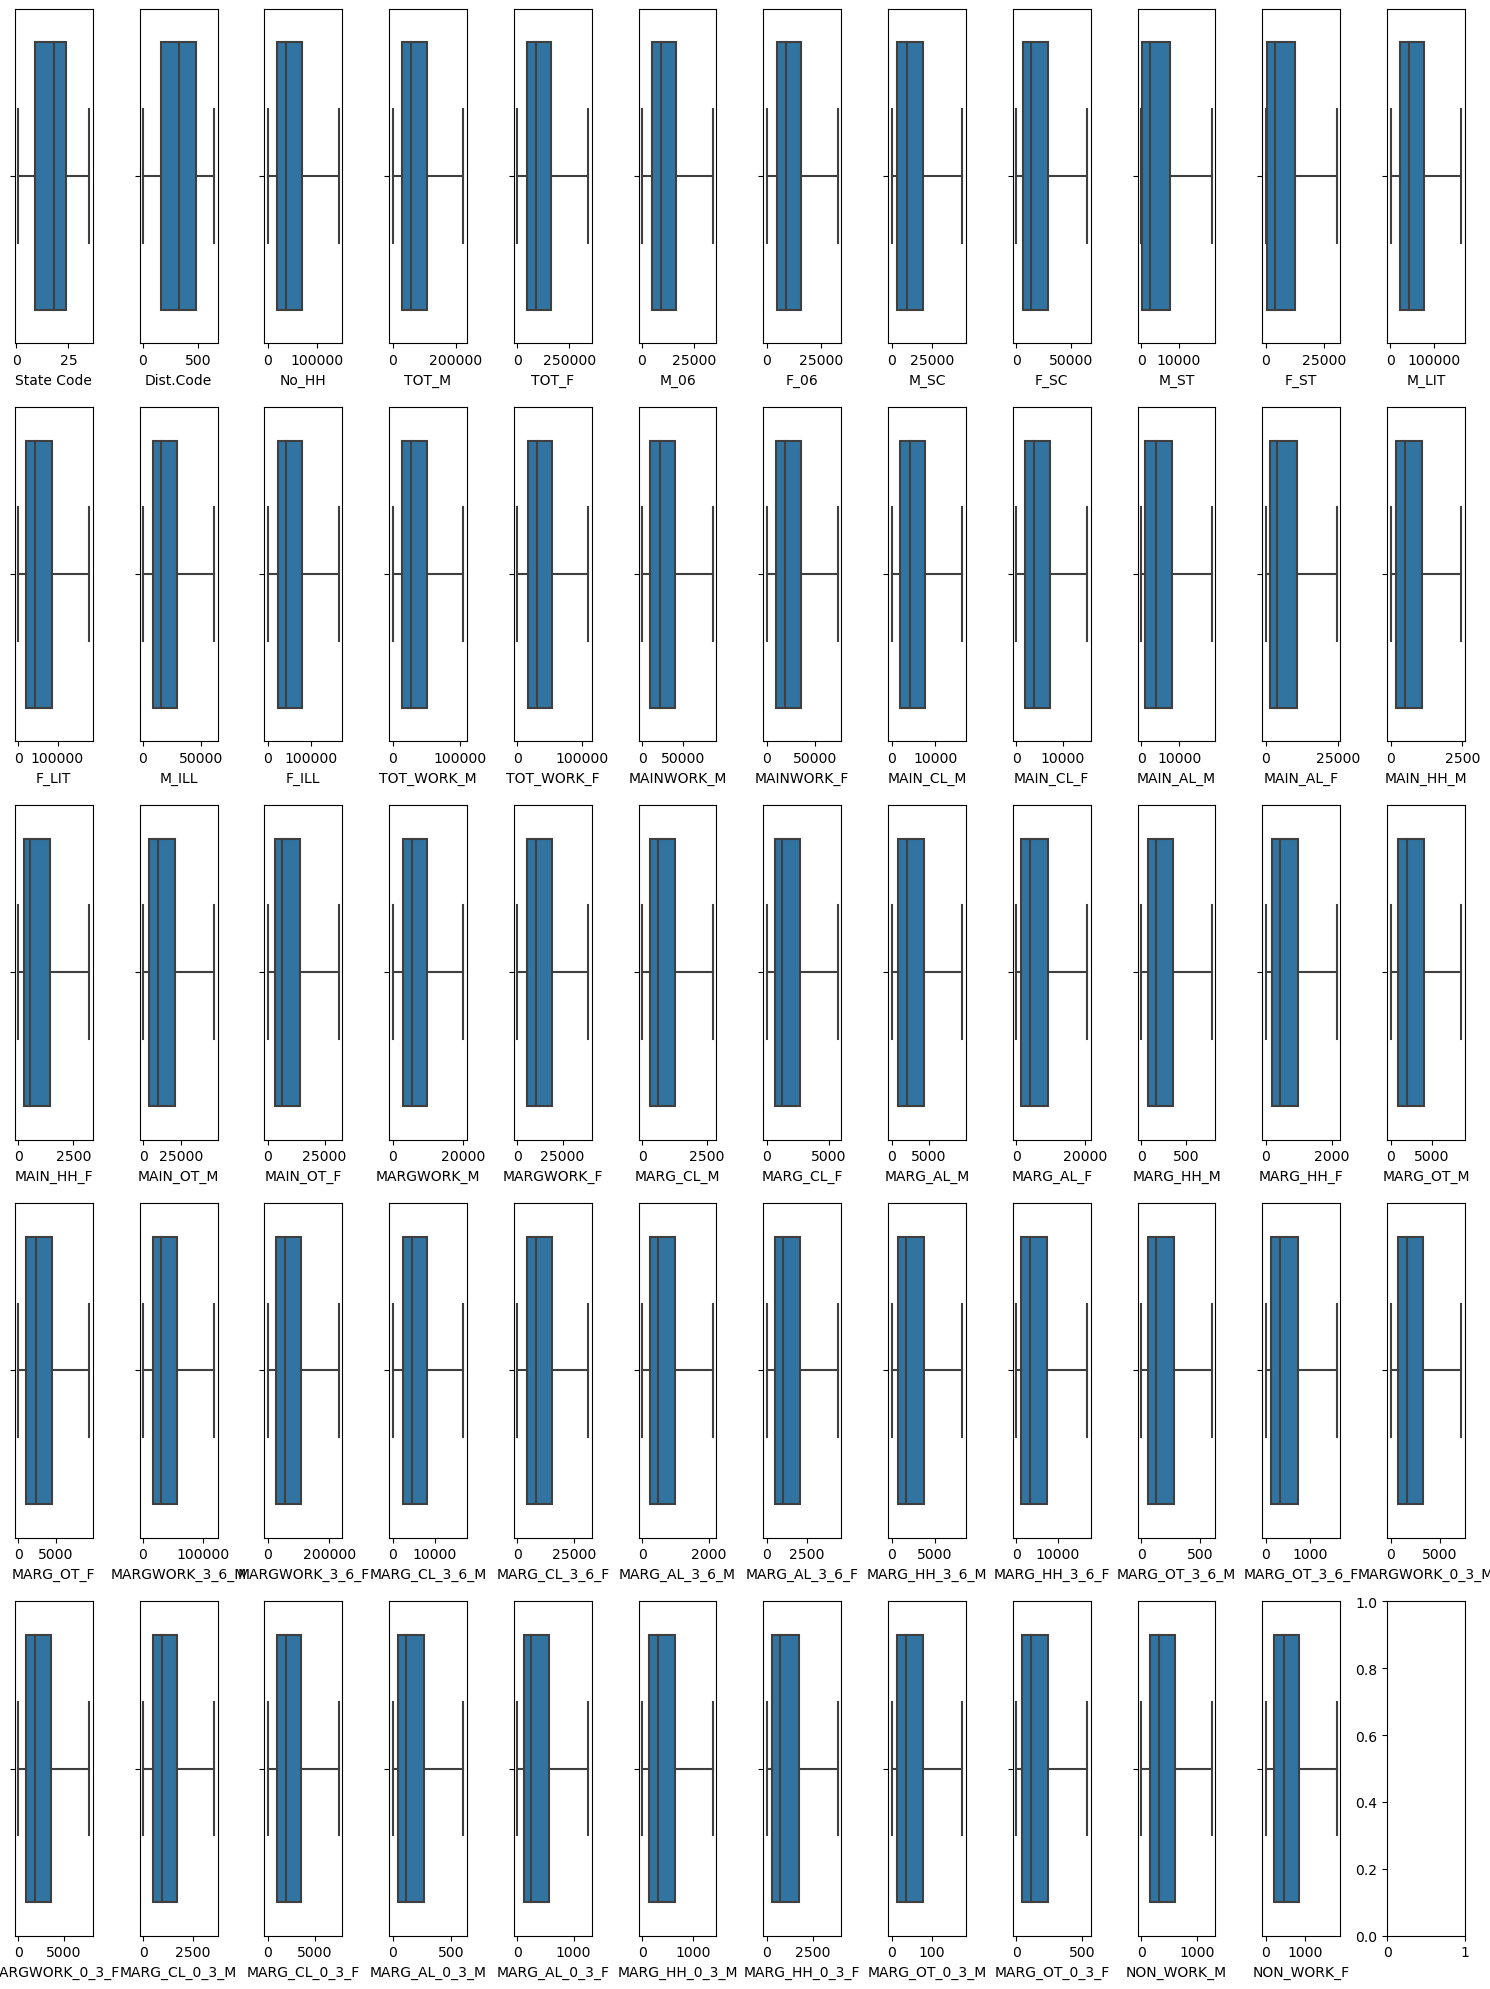

In [399]:
# Assuming dx_new is your DataFrame
columns = dx_num.columns
num_rows = 5
num_cols = 12

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, column in enumerate(columns):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.boxplot(x=dx_num[column], ax=ax)
    

plt.tight_layout()
plt.show()

then scaling  the data

In [400]:
scaled_dx =dx_new.apply(zscore)
scaled_dx

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1   -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2   -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3   -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4   -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   
..        ...       ...       ...       ...       ...       ...       ...   
635 -0.995677 -0.978990 -0.974268 -0.971387 -0.948916 -0.957326 -0.955667   
636 -0.844340 -0.921822 -0.886965 -0.936754 -0.919757 -0.803806 -0.765670   
637 -1.038465 -1.069066 -1.054885 -1.051356 -1.035331 -0.958783 -0.957049   
638 -0.986758 -1.019276 -1.007472 -1.008195 -0.996541 -0.958783 -0.957049   
639 -0.899166 -0.926854 -0.919050 -0.943193 -0.935220 -0.958783 -0.957049   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0   -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1   -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2   -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3   -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4    0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   
..        ...       ...       ...  ...            ...            ...   
635 -0.625124 -0.640197 -0.913820  ...      -0.914299      -0.972530   
636 -0.625124 -0.640197 -0.853390  ...      -0.831668      -0.868461   
637 -0.522953 -0.529880 -1.016367  ...      -0.865930      -0.941309   
638 -0.622297 -0.637046 -0.962328  ...      -0.844432      -0.927673   
639 -0.608870 -0.623555 -0.856916  ...      -0.819576      -0.945616   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0        -0.156494      -0.287524       0.156577      -0.657412   
1        -0.282327      -0.294688      -0.491731      -0.723062   
2        -0.456727      -0.420050      -0.731894      -0.795026   
3        -0.419198      -0.385127      -0.718770      -0.784926   
4         0.472670       0.434200      -0.466796      -0.625849   
..             ...            ...            ...            ...   
635      -0.553861      -0.499744      -0.735831      -0.816489   
636      -0.547238      -0.487208      -0.685961      -0.734425   
637      -0.533992      -0.496162      -0.733206      -0.812701   
638      -0.500878      -0.460344      -0.721395      -0.803232   
639      -0.540615      -0.497953      -0.713521      -0.805757   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        -0.365258      -0.499977   -0.413053   -0.539614  
1         0.042855      -0.073481   -0.606455   -0.598988  
2        -0.662068      -0.635680   -0.726103   -0.707839  
3        -0.624966      -0.616294   -0.645791   -0.710038  
4        -0.439461      -0.309346   -0.540895   -0.249344  
..             ...            ...         ...         ...  
635      -0.662068      -0.648604   -0.783468   -0.723232  
636      -0.624966      -0.574290   -0.655625   -0.587993  
637      -0.504388      -0.496746   -0.711352   -0.690247  
638      -0.652792      -0.635680   -0.672015   -0.661660  
639      -0.643517      -0.635680   -0.593343   -0.666058  

[640 rows x 57 columns]

### Part 2-3); PCA: PCA
###### - Create the covariance matrix - Get eigen values and eigen vectors - Identify the optimum number of PCs - Show Scree plot - Compare PCs with Actual Columns and identify which is explaining most variance - Write inferences about all the PCs in terms of actual variables - Write linear equation for first PC Note: For the scope of this project, take at least 90% explained variance.

ANSWER:

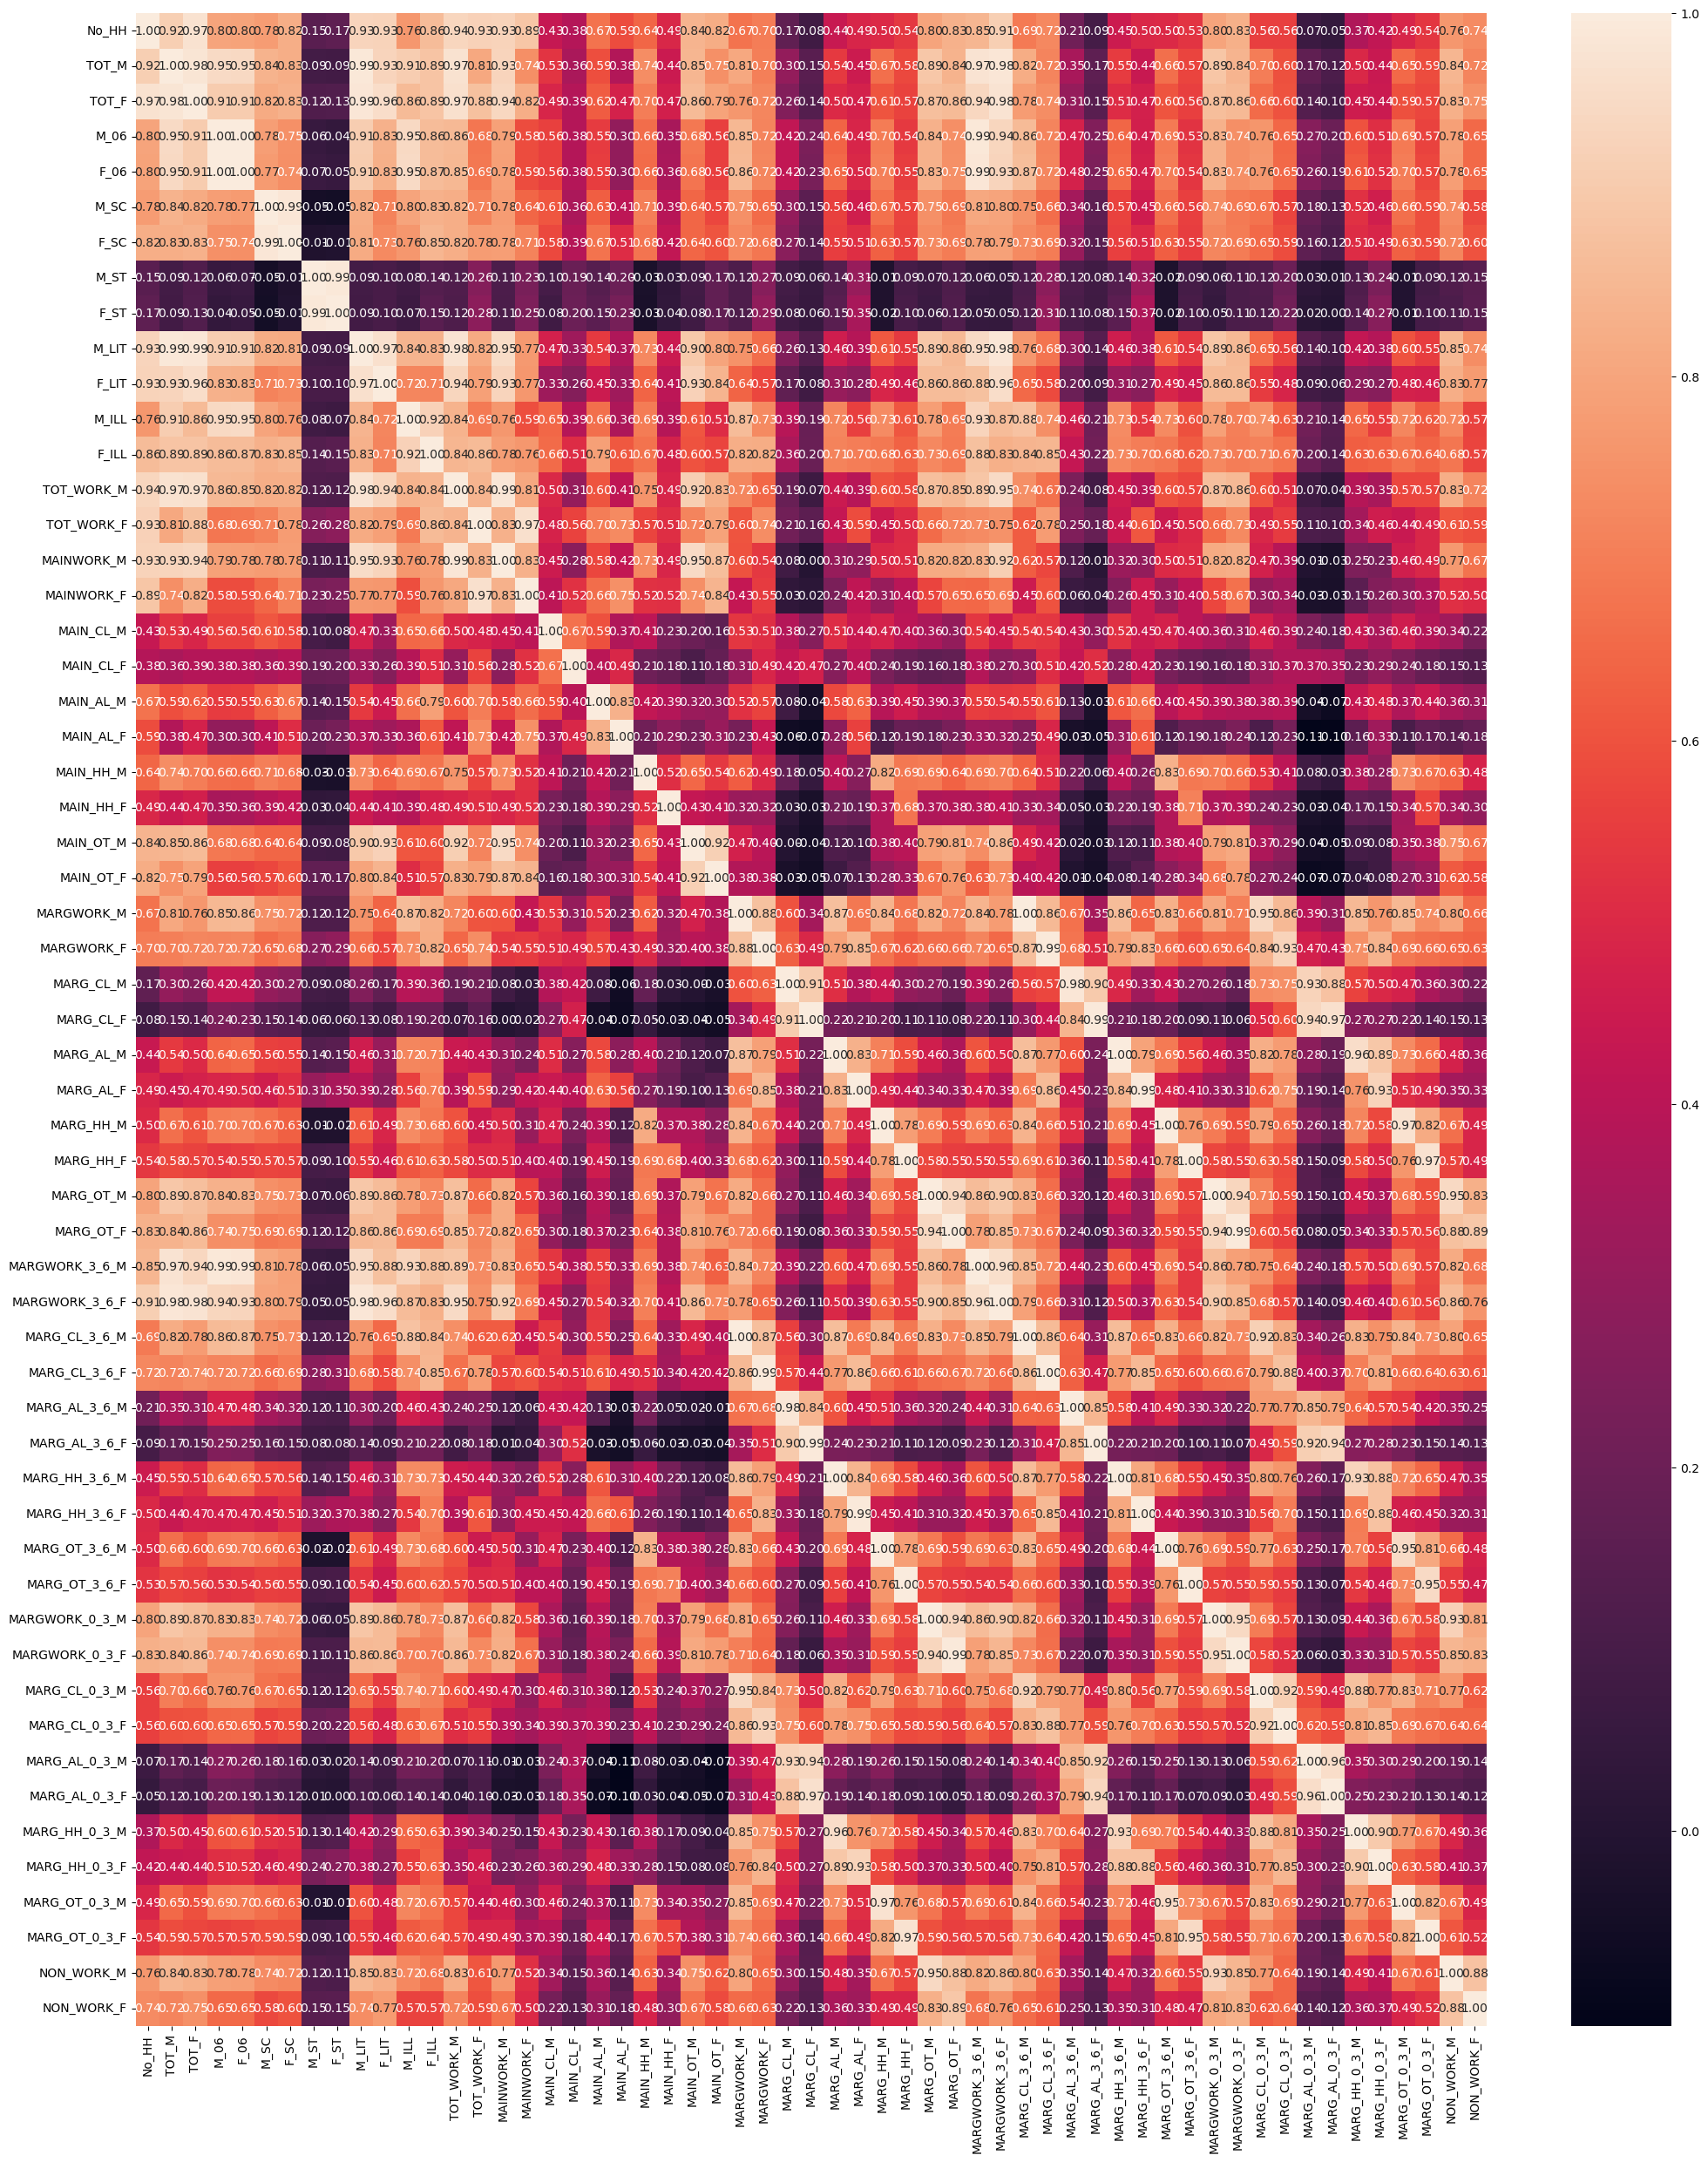

In [401]:
#Check for presence of correlations
plt.figure(figsize = (25,30))
sns.heatmap(scaled_dx.corr(), annot=True,fmt='.2f');

In [402]:
scaled_dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   TOT_M           640 non-null    float64
 2   TOT_F           640 non-null    float64
 3   M_06            640 non-null    float64
 4   F_06            640 non-null    float64
 5   M_SC            640 non-null    float64
 6   F_SC            640 non-null    float64
 7   M_ST            640 non-null    float64
 8   F_ST            640 non-null    float64
 9   M_LIT           640 non-null    float64
 10  F_LIT           640 non-null    float64
 11  M_ILL           640 non-null    float64
 12  F_ILL           640 non-null    float64
 13  TOT_WORK_M      640 non-null    float64
 14  TOT_WORK_F      640 non-null    float64
 15  MAINWORK_M      640 non-null    float64
 16  MAINWORK_F      640 non-null    float64
 17  MAIN_CL_M       640 non-null    flo

In [403]:
scaled_dx

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1   -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2   -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3   -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4   -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   
..        ...       ...       ...       ...       ...       ...       ...   
635 -0.995677 -0.978990 -0.974268 -0.971387 -0.948916 -0.957326 -0.955667   
636 -0.844340 -0.921822 -0.886965 -0.936754 -0.919757 -0.803806 -0.765670   
637 -1.038465 -1.069066 -1.054885 -1.051356 -1.035331 -0.958783 -0.957049   
638 -0.986758 -1.019276 -1.007472 -1.008195 -0.996541 -0.958783 -0.957049   
639 -0.899166 -0.926854 -0.919050 -0.943193 -0.935220 -0.958783 -0.957049   

         M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0   -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1   -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2   -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3   -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4    0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   
..        ...       ...       ...  ...            ...            ...   
635 -0.625124 -0.640197 -0.913820  ...      -0.914299      -0.972530   
636 -0.625124 -0.640197 -0.853390  ...      -0.831668      -0.868461   
637 -0.522953 -0.529880 -1.016367  ...      -0.865930      -0.941309   
638 -0.622297 -0.637046 -0.962328  ...      -0.844432      -0.927673   
639 -0.608870 -0.623555 -0.856916  ...      -0.819576      -0.945616   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0        -0.156494      -0.287524       0.156577      -0.657412   
1        -0.282327      -0.294688      -0.491731      -0.723062   
2        -0.456727      -0.420050      -0.731894      -0.795026   
3        -0.419198      -0.385127      -0.718770      -0.784926   
4         0.472670       0.434200      -0.466796      -0.625849   
..             ...            ...            ...            ...   
635      -0.553861      -0.499744      -0.735831      -0.816489   
636      -0.547238      -0.487208      -0.685961      -0.734425   
637      -0.533992      -0.496162      -0.733206      -0.812701   
638      -0.500878      -0.460344      -0.721395      -0.803232   
639      -0.540615      -0.497953      -0.713521      -0.805757   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0        -0.365258      -0.499977   -0.413053   -0.539614  
1         0.042855      -0.073481   -0.606455   -0.598988  
2        -0.662068      -0.635680   -0.726103   -0.707839  
3        -0.624966      -0.616294   -0.645791   -0.710038  
4        -0.439461      -0.309346   -0.540895   -0.249344  
..             ...            ...         ...         ...  
635      -0.662068      -0.648604   -0.783468   -0.723232  
636      -0.624966      -0.574290   -0.655625   -0.587993  
637      -0.504388      -0.496746   -0.711352   -0.690247  
638      -0.652792      -0.635680   -0.672015   -0.661660  
639      -0.643517      -0.635680   -0.593343   -0.666058  

[640 rows x 57 columns]

###### Statistical tests to be done before PCA
Bartletts Test of Sphericity

Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated

Ha: At least one pair of variables in the data are correlated
If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small(Reject H0 if p-value < 0.05), then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended

In [404]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_dx)
p_value

c:\Users\SABIR\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

the p-value is small(Reject H0 if p-value < 0.05), then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended

###### KMO Test
The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [405]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_dx)
kmo_model

c:\Users\SABIR\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.803988993278217

MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

##### 2-3-a)-Create the covariance matrix 

In [406]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca=PCA(n_components=57,random_state=123)
pca_trans=pca.fit_transform(scaled_dx)

In [407]:
#co variance matrix
pca_trans

array([[-4.61726348e+00,  1.38115857e-01,  3.28544953e-01, ...,
        -6.06029097e-16,  6.08748032e-16,  2.96207163e-16],
       [-4.77166187e+00, -1.05865351e-01,  2.44448976e-01, ...,
         2.27457842e-16,  1.68484483e-16,  4.64305393e-16],
       [-5.96483558e+00, -2.94346892e-01,  3.67393453e-01, ...,
         4.15150177e-16, -4.48318483e-17,  8.23349729e-16],
       ...,
       [-6.29462500e+00, -6.38126644e-01,  1.07482817e-01, ...,
         3.45399264e-16,  1.72137876e-16, -4.11830008e-16],
       [-6.22319199e+00, -6.72319673e-01,  2.71325467e-01, ...,
        -1.01201345e-15, -4.66369483e-16,  1.55035951e-16],
       [-5.89623627e+00, -9.37169526e-01,  3.49218364e-01, ...,
        -6.19779140e-17,  3.72269309e-16, -5.80404880e-16]])

##### 2-3-b) Get eigen values and eigen vectors

In [408]:
#Check the eigen values
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [409]:
#Extract eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.2077636 ,  0.24647657, ..., -0.07217993,
         0.00399206, -0.06929081],
       [ 0.        ,  0.2887035 , -0.20596721, ...,  0.04019745,
        -0.03192722,  0.00778048],
       [-0.        ,  0.18790022,  0.02642675, ..., -0.02597314,
        -0.13972835, -0.02147533]])

##### 2-3-c)Identify the optimum number of PCs 

In [410]:
#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
exp_var

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [411]:
#Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(exp_var)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 55.73  69.51  76.79  83.21  87.08  90.47  92.53  93.85  94.93  95.85
  96.61  97.23  97.75  98.24  98.57  98.81  99.01  99.2   99.37  99.51
  99.61  99.69  99.75  99.81  99.85  99.89  99.92  99.94  99.96  99.97
  99.98  99.99 100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]


We can see above that more than 90% of the variance is explained by 6 Principal Components.

###### optimum number of PCs is 6

#### 2-3-d)-Show Scree plot

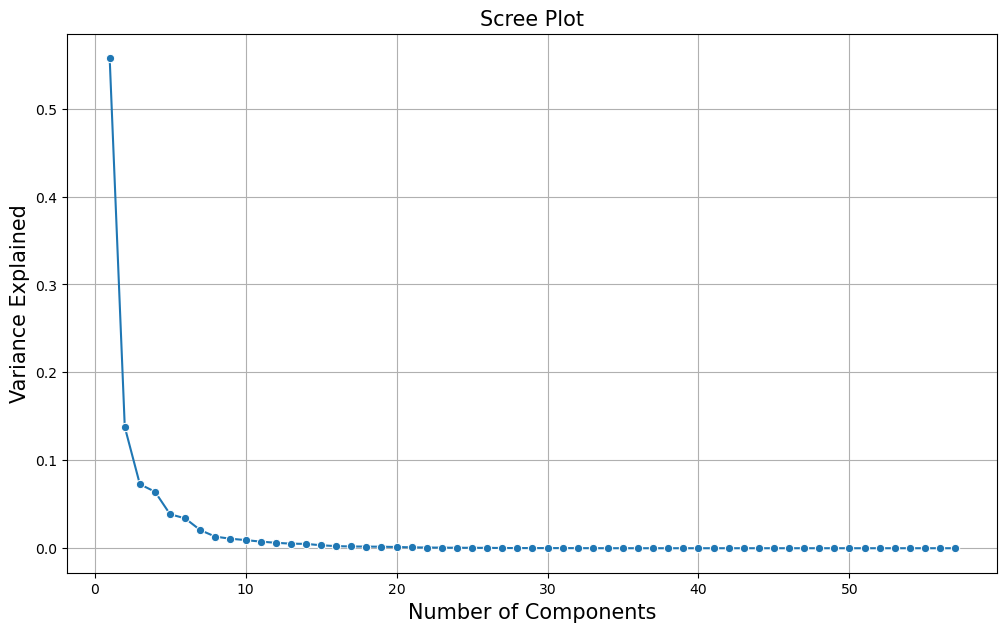

In [417]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=exp_var,x=range(1,len(exp_var)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

The number of components can be decided based upon the explained variance. Here, it is decided to keep the number of components as 7 as the cumulative explained variance is above 90%

In [418]:
# find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  6


##### Observations:

We can see that out of the 59 original features, we reduced the number of features through principal components to 7, these components explain more than 90% of the original variance.
Let us now look at these principal components as a linear combination of original features.

#### 2-3-e)-Compare PCs with Actual Columns and identify which is explaining most variance,Write inferences about all the PCs in terms of actual variables

In [419]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6']
dx_select = pd.DataFrame(np.round(pca.components_[:6,:],2),index=pc_comps,columns=scaled_dx.columns)
dx_selected=dx_select.T
dx_selected

PC1   PC2   PC3   PC4   PC5   PC6
No_HH           0.16 -0.13 -0.00 -0.13 -0.01  0.00
TOT_M           0.17 -0.09  0.06 -0.02 -0.03 -0.07
TOT_F           0.17 -0.10  0.04 -0.07 -0.01 -0.04
M_06            0.16 -0.02  0.06  0.01 -0.05 -0.16
F_06            0.16 -0.02  0.05  0.01 -0.04 -0.15
M_SC            0.15 -0.05  0.00  0.01 -0.17 -0.06
F_SC            0.15 -0.05 -0.03 -0.03 -0.16 -0.04
M_ST            0.03  0.03 -0.12 -0.22  0.43  0.22
F_ST            0.03  0.03 -0.14 -0.23  0.44  0.23
M_LIT           0.16 -0.12  0.08 -0.04 -0.01 -0.06
F_LIT           0.15 -0.15  0.12 -0.06  0.06 -0.05
M_ILL           0.16 -0.01 -0.02  0.03 -0.10 -0.12
F_ILL           0.17 -0.01 -0.09 -0.08 -0.12 -0.03
TOT_WORK_M      0.16 -0.13  0.05 -0.04 -0.02 -0.00
TOT_WORK_F      0.15 -0.09 -0.06 -0.23 -0.04  0.11
MAINWORK_M      0.15 -0.18  0.05 -0.07 -0.04  0.02
MAINWORK_F      0.12 -0.15 -0.06 -0.25 -0.08  0.12
MAIN_CL_M       0.10  0.06 -0.07 -0.09 -0.29 -0.01
MAIN_CL_F       0.07  0.09 -0.01 -0.29 -0.24  0.10
MAIN_AL_M       0.11 -0.03 -0.25 -0.14 -0.21 -0.03
MAIN_AL_F       0.07 -0.06 -0.25 -0.29 -0.18  0.02
MAIN_HH_M       0.13 -0.08  0.03  0.15 -0.13  0.17
MAIN_HH_F       0.08 -0.08 -0.06  0.05 -0.14  0.42
MAIN_OT_M       0.12 -0.21  0.14 -0.04  0.06  0.02
MAIN_OT_F       0.11 -0.21  0.10 -0.12  0.08  0.08
MARGWORK_M      0.16  0.09 -0.01  0.09  0.06 -0.09
MARGWORK_F      0.16  0.13 -0.05 -0.09  0.09  0.02
MARG_CL_M       0.08  0.27  0.20 -0.06 -0.02  0.03
MARG_CL_F       0.05  0.25  0.27 -0.17 -0.06  0.09
MARG_AL_M       0.13  0.17 -0.19  0.09  0.02 -0.14
MARG_AL_F       0.11  0.14 -0.27 -0.11  0.08 -0.09
MARG_HH_M       0.14  0.07 -0.02  0.24 -0.06  0.09
MARG_HH_F       0.13  0.02 -0.08  0.20 -0.03  0.37
MARG_OT_M       0.16 -0.09  0.11  0.09  0.12 -0.06
MARG_OT_F       0.15 -0.12  0.10  0.03  0.17  0.00
MARGWORK_3_6_M  0.16 -0.04  0.06 -0.00 -0.04 -0.14
MARGWORK_3_6_F  0.16 -0.11  0.08  0.00  0.00 -0.11
MARG_CL_3_6_M   0.17  0.08 -0.02  0.09  0.05 -0.10
MARG_CL_3_6_F   0.16  0.10 -0.07 -0.11  0.07  0.02
MARG_AL_3_6_M   0.09  0.26  0.15 -0.04 -0.01  0.01
MARG_AL_3_6_F   0.05  0.24  0.26 -0.18 -0.06  0.09
MARG_HH_3_6_M   0.13  0.16 -0.20  0.08  0.01 -0.14
MARG_HH_3_6_F   0.11  0.13 -0.28 -0.14  0.06 -0.08
MARG_OT_3_6_M   0.14  0.06 -0.02  0.24 -0.07  0.10
MARG_OT_3_6_F   0.12  0.01 -0.08  0.19 -0.04  0.38
MARGWORK_0_3_M  0.15 -0.09  0.11  0.09  0.11 -0.06
MARGWORK_0_3_F  0.15 -0.13  0.10  0.03  0.14  0.01
MARG_CL_0_3_M   0.15  0.15  0.05  0.09  0.08 -0.06
MARG_CL_0_3_F   0.14  0.18  0.02 -0.02  0.13 -0.00
MARG_AL_0_3_M   0.05  0.25  0.27 -0.10 -0.05  0.07
MARG_AL_0_3_F   0.04  0.24  0.28 -0.14 -0.05  0.08
MARG_HH_0_3_M   0.12  0.19 -0.14  0.13  0.06 -0.12
MARG_HH_0_3_F   0.12  0.18 -0.20  0.00  0.13 -0.11
MARG_OT_0_3_M   0.14  0.08 -0.02  0.23 -0.04  0.06
MARG_OT_0_3_F   0.13  0.05 -0.08  0.21  0.00  0.30
NON_WORK_M      0.15 -0.07  0.11  0.08  0.16 -0.05
NON_WORK_F      0.13 -0.07  0.10  0.02  0.24 -0.02

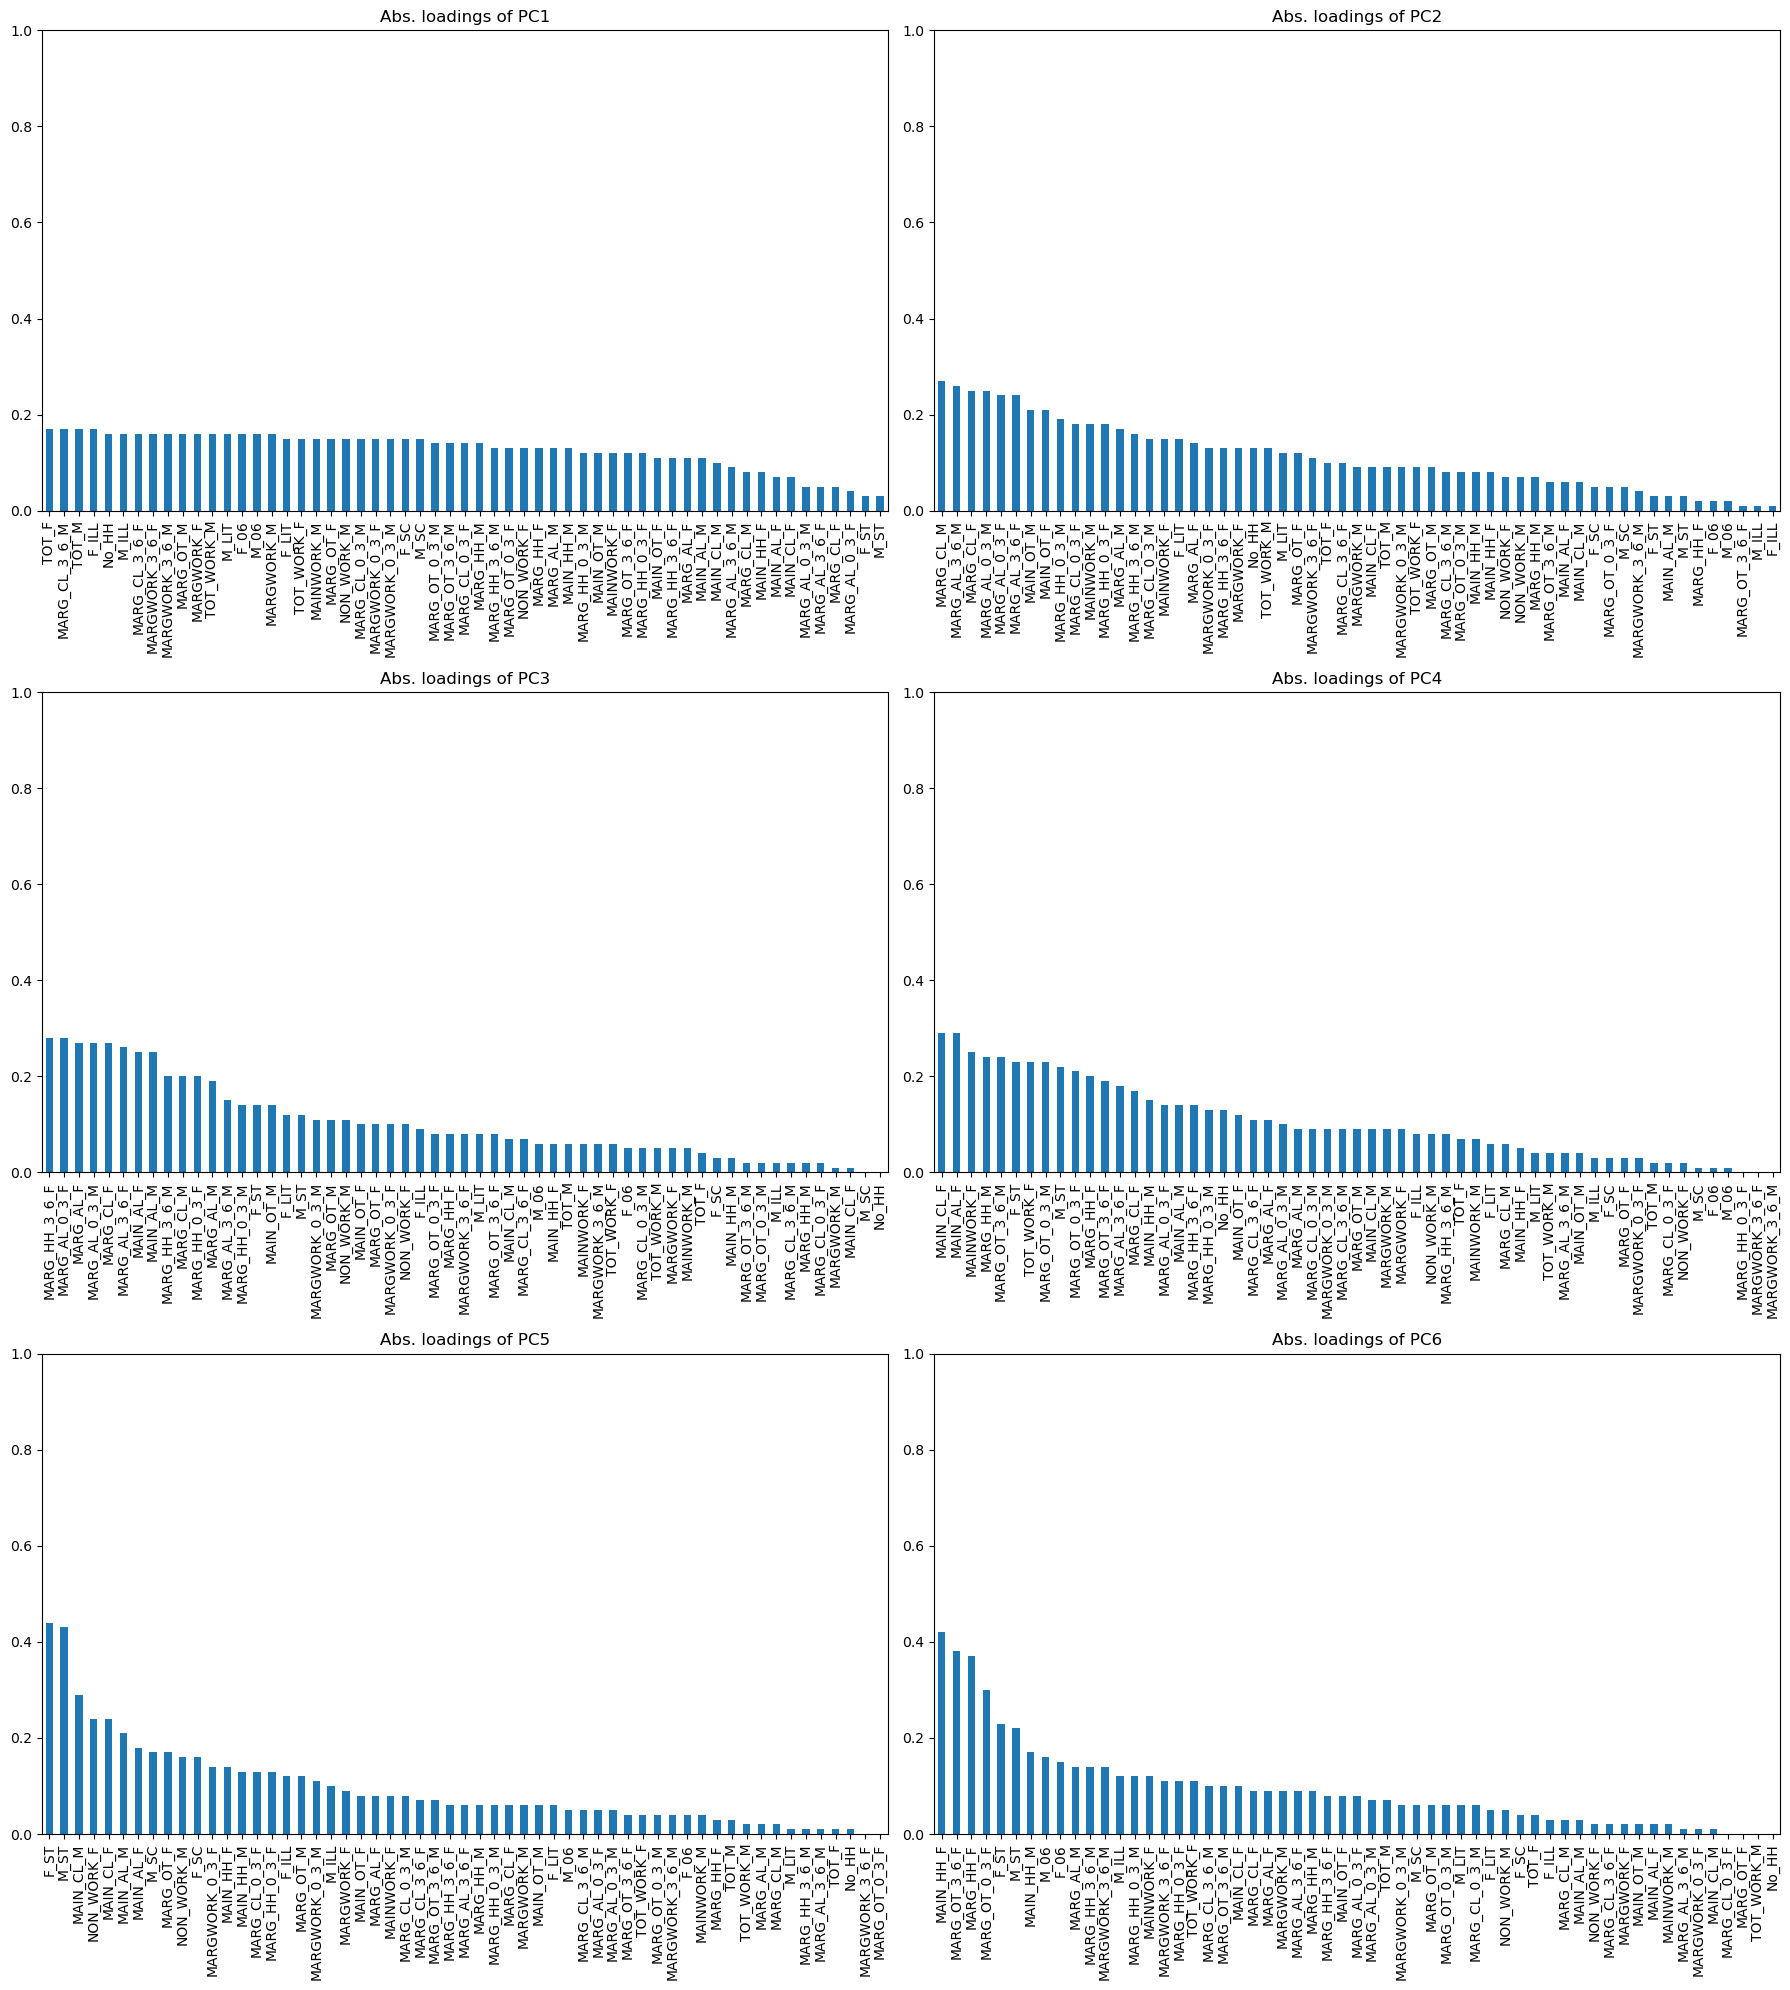

In [420]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (18,20))
for i in range(len(dx_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(dx_selected[dx_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(dx_selected.columns[i]))
    plt.tight_layout()

In [421]:
def color_high(val):
    if val <= -0.10: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.10:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

###### OBSERVATION
###### PC1 is explaining most variance.

* The first principal component, PC1, is a measure of mpg, cylinders, displacement, horsepower, and weight. PC1 is associated with high scores of almost all variables('No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC','M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', ',TOT_WORK_F''MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M ,'MAIN_AL_M', 'MAIN_HH_M', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
        'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F' M_ST,F_ST
       no negative scores in PC1.

* PC2 have less explain variance than PC2,The second principal component, PC2, is a measure of model year. PC2 is associated with low values of "No_HH','TOT_F','M_LIT', 'F_LIT','TOT_WORK_M','MAINWORK_M', 'MAINWORK_F','MAIN_OT_M', 'MAIN_OT_F','MARG_OT_F', 'MARGWORK_3_6_F','MARGWORK_0_3_F'

#### 2-3-f)Write linear equation for first PC Note


PC1 have explain all variance and all are high

To write the linear equation for PC1 (Principal Component 1), you can express PC1 as a linear combination of the original variables. Let's denote the original variables as (X_1, X_2, X_3, ......., X_n\) and their corresponding coefficients in PC1 as (a_1, a_2, a_3,.........., a_n\). The linear equation for PC1 can be written as:

PC1=a1x1a2x2............................anxn.

Using the coefficients provided in your data, the linear equation for PC1 would be

This equation represents the linear combination of the original variables that make up PC1. The coefficients indicate the contribution of each variable to the overall value of PC1.

PC1=a1x1*a2x2*............................anxn.

0.16*No_HH+
0.17*TOT_M+
0.17*TOT_F+
0.16*M_06+
0.16*F_06+
0.15*M_SC+
0.15*F_SC+
0.03*M_ST+
0.03*F_ST+
0.16*M_LIT+
0.15*F_LIT+
0.16*M_ILL+
0.17*F_ILL +
0.16*TOT_WORK_M +     
0.15*TOT_WORK_F+        
0.15*MAINWORK_M+       
0.12*MAINWORK_F+      
0.10*MAIN_CL_M+         
0.07*MAIN_CL_F+         
0.11*MAIN_AL_M +        
0.07*MAIN_AL_F +       
0.13*MAIN_HH_M +      
0.08*MAIN_HH_F+     
0.12*MAIN_OT_M+         
0.11*MAIN_OT_F +        
0.16*MARGWORK_M +       
0.16*MARGWORK_F +      
0.16*MARG_CL_M +      
0.05*MARG_CL_F +       
0.13*MARG_AL_M +      
0.11*MARG_AL_F +     
0.14*MARG_HH_M +    
0.13*MARG_HH_F +     
0.16*MARG_OT_M +    
0.15*MARG_OT_F +   
0.16*MARGWORK_3_6_M + 
0.16*MARGWORK_3_6_F +  
0.17*MARG_CL_3_6_M  + 
0.16*MARG_CL_3_6_F  +   
0.09*MARG_AL_3_6_M  +  
0.05*MARG_AL_3_6_F  +  
0.13*MARG_HH_3_6_M  +  
0.13*MARG_HH_3_6_F  +  
0.14*MARG_OT_3_6_M  + 
0.12*MARG_OT_3_6_F  +
0.15*MARGWORK_0_3_M +
0.15*MARGWORK_0_3_F +
0.15*MARG_CL_0_3_M  +
0.14*MARG_CL_0_3_F  +
0.05*MARG_AL_0_3_M  +
0.04*MARG_AL_0_3_F  +
0.12*MARG_HH_0_3_M  +
0.12*MARG_HH_0_3_F  +
0.14*MARG_OT_0_3_M  +
0.13*MARG_OT_0_3_F  +
0.15*NON_WORK_M     +
0.13*NON_WORK_F     

